## Missão 🎯

Para essa segunda parte, a nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem

## Objetivos do desafio 🧠

- Preparar os dados para a modelagem (tratamento, encoding, normalização)

- Realizar análise de correlação e seleção de variáveis.

- Treinar dois ou mais modelos de classificação.

- Avaliar o desempenho dos modelos com métricas.

- Interpretar os resultados, incluindo a importância das variáveis.

- Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

## 🧰 O que vamos praticar

✅ Pré-processamento de dados para Machine Learning

✅ Construção e avaliação de modelos preditivos

✅ Interpretação dos resultados e entrega de insights

✅ Comunicação técnica com foco estratégico



# Começando o Desafio:

> ## Carregamento dos dados

In [7]:
import pandas as pd

dados= pd.read_csv('/content/dados_tratados.csv')
dados.head()

,id_cliente,evasao,genero,cliente_idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonico,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,gastos_mensais,gastos_totais,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [8]:
dados.tail()

,id_cliente,evasao,genero,cliente_idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonico,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,gastos_mensais,gastos_totais,contas_diarias
7027,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.84
7028,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.84
7029,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7030,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26
7031,9995-HOTOH,0,Male,0,1,1,63,0,0,DSL,...,1,0,1,1,Two year,0,Electronic check,59.00,3707.60,1.97


> ## Uma breve análise exploratória para entendermos os dados

In [9]:
dados.shape

(7032, 22)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7032 non-null   object 
 1   evasao                7032 non-null   int64  
 2   genero                7032 non-null   object 
 3   cliente_idoso         7032 non-null   int64  
 4   possui_parceiro       7032 non-null   int64  
 5   possui_dependentes    7032 non-null   int64  
 6   tempo_contrato_meses  7032 non-null   int64  
 7   servico_telefonico    7032 non-null   int64  
 8   multiplas_linhas      7032 non-null   int64  
 9   tipo_internet         7032 non-null   object 
 10  seguranca_online      7032 non-null   int64  
 11  backup_online         7032 non-null   int64  
 12  protecao_dispositivo  7032 non-null   int64  
 13  suporte_tecnico       7032 non-null   int64  
 14  streaming_tv          7032 non-null   int64  
 15  streaming_filmes     

In [11]:
dados.describe()

,evasao,cliente_idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,fatura_online,gastos_mensais,gastos_totais,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159891
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002955
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.187500
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.992500
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [12]:
dados.describe(include='O')

,id_cliente,genero,tipo_internet,tipo_contrato,forma_pagamento
count,7032,7032,7032,7032,7032
unique,7032,2,3,3,4
top,9995-HOTOH,Male,Fiber optic,Month-to-month,Electronic check
freq,1,3549,3096,3875,2365


Em uma rápida análise conseguimos ver que em sua maioria os dados estão tratados, podemos perceber que os valores booleanos se encontram em um padrão adequado para trabalhar com modelos preditívos. Contudo, ainda é necessário alguns pequenos ajustes para começarmos de fato a trabalhar e entender os dados.   

> ## Visualizando melhor os dados

In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
import plotly.graph_objects as go
import plotly.io as pio

# Definindo uma paleta de cores
soft_colors_two = [
    '#a8e6cf',  # Light mint green
    '#ffd3b6'   # Light peach
]

# Criando um template de cores
soft_theme_two_colors = go.layout.Template(
    layout=go.Layout(
        colorway=soft_colors_two,
        plot_bgcolor='#f7f7f7',  # Light grey background
        paper_bgcolor='#f7f7f7', # Light grey paper background
        font=dict(color='#333333') # Dark grey font
    )
)

# Register the template
pio.templates['soft_two_colors'] = soft_theme_two_colors

pio.templates.default = 'plotly+soft_two_colors'

>> #### Variáveis categóricas


In [15]:
dicionario_evasão = {
    0: 'Não evadido',
    1: 'Evasão'
}

fig = px.histogram(dados, x='evasao', color='evasao', text_auto=True, labels={'evasao': 'Status de Evasão', 'color': 'Status de Evasão'})
fig.update_layout(xaxis = dict(tickvals = list(dicionario_evasão.keys()), ticktext = list(dicionario_evasão.values())))
fig.update_xaxes(title_text='Status de Evasão')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

Podemos que ver no dado alvo não está perfeitamente balanceado e por isso uma boa prática é tentar manter essa proporção nas seleções de treino. Ou balancear os dados.

In [16]:
fig = px.histogram(dados, x='genero', color='evasao', text_auto=True, barmode='group')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Gênero')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

Isso nos mostra que pouco importa o genero do cliente no que se refere a evasão e muito provavelmente essa variável não terá valor significativo para o nosso modelo.

In [17]:
fig = px.histogram(dados, x='tipo_internet', color='evasao', text_auto=True, barmode='group')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Tipo de Internet')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

Essa pode ser uma variável interessante, pois podemos ver que clientes que utilizam fibra óptica possuem uma tendência maior a realizar uma evasão de contrato.  

In [18]:
fig = px.histogram(dados, x='tipo_contrato', color='evasao', text_auto=True, barmode='group')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Tipo de Contrato')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

A variável tipo_contrato segue o mesmo padrão do tipo de internet. E talvez aqui até tenha um sentido mais nítido, onde é fato que contratos mês a mês são mais faceis de serem rompidos. E essa será uma variável importante.  

In [19]:
fig = px.histogram(dados, x='forma_pagamento', color='evasao', text_auto=True, barmode='group')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Forma de Pagamento')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

Em relação a forma de pagamento, podemos ver um comportamento anormal para clientes que pagam com cheque eletrônico. E esse pode ser uma fator importante para o nosso modelo.  

>> #### Variáveis categóricas Booleanas


In [20]:
boolean_cols = ['cliente_idoso', 'possui_parceiro', 'possui_dependentes', 'servico_telefonico', 'multiplas_linhas', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes', 'fatura_online']

boolean_labels = {
    'cliente_idoso': {0: 'Não Idoso', 1: 'Idoso'},
    'possui_parceiro': {0: 'Sem Parceiro', 1: 'Com Parceiro'},
    'possui_dependentes': {0: 'Sem Dependentes', 1: 'Com Dependentes'},
    'servico_telefonico': {0: 'Sem Serviço Telefônico', 1: 'Com Serviço Telefônico'},
    'multiplas_linhas': {0: 'Sem Múltiplas Linhas', 1: 'Com Múltiplas Linhas'},
    'seguranca_online': {0: 'Sem Segurança Online', 1: 'Com Segurança Online'},
    'backup_online': {0: 'Sem Backup Online', 1: 'Com Backup Online'},
    'protecao_dispositivo': {0: 'Sem Proteção de Dispositivo', 1: 'Com Proteção de Dispositivo'},
    'suporte_tecnico': {0: 'Sem Suporte Técnico', 1: 'Com Suporte Técnico'},
    'streaming_tv': {0: 'Sem Streaming TV', 1: 'Com Streaming TV'},
    'streaming_filmes': {0: 'Sem Streaming Filmes', 1: 'Com Streaming Filmes'},
    'fatura_online': {0: 'Sem Fatura Online', 1: 'Com Fatura Online'}
}


for col in boolean_cols:
  fig = px.histogram(dados, x=col, color='evasao', text_auto=True, barmode='group')
  fig.update_layout(legend_title_text='Status de Evasão')
  fig.update_xaxes(title_text=col)
  fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))

  # Adicionar rótulos descritivos no eixo x
  if col in boolean_labels:
      fig.update_layout(xaxis = dict(
          tickvals = list(boolean_labels[col].keys()),
          ticktext = list(boolean_labels[col].values())
      ))

  fig.show()

Com esses gráficos temos uma noção rápida da distribuição e proporção dos dados categóricos do tipo booleano. Além de entender para qual lado impacta mais pertencer a uma categoria ou não.

Em resumo, variáveis como a ausência de parceiro e dependentes, a falta de serviços de segurança/suporte online e o recebimento de fatura online parecem ser indicadores importantes para prever a evasão. O tipo de serviço telefônico e as múltiplas linhas parecem ter menos impacto.

>> #### Variáveis numéricas

In [21]:
dados.describe().head(0).drop(columns= boolean_cols)

,evasao,tempo_contrato_meses,gastos_mensais,gastos_totais,contas_diarias


In [22]:
fig = px.box(dados, x='gastos_mensais', color='evasao')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Gastos Mensais')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

O boxplot mostra que os clientes que evadem ("Evasão") tendem a ter gastos mensais mais altos do que os clientes que não evadem ("Não evadido"). A distribuição dos gastos mensais para clientes que evadem também parece ser um pouco mais ampla e com a mediana mais alta, reforçando essa tendência

In [23]:
fig = px.box(dados, x='gastos_totais', color='evasao')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Gastos Mensais')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

Aqui, a assimetria à direita é bem evidente para ambos os grupos. O boxplot sugere que clientes que não evadem geralmente têm gastos totais significativamente maiores. Isso faz sentido, pois clientes com contratos de longo prazo (que tendem a não evadir) acumularão gastos totais mais altos.

Clientes que evadem tendem a estar concentrados na parte inferior da distribuição de gastos totais, indicando que muitos evadem relativamente cedo.

Tanto que clientes que evadem com gastos totais muito altos são vistos como outliers.

In [24]:
fig = px.box(dados, x='contas_diarias', color='evasao')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Gastos Mensais')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()


Similar aos gastos mensais, o boxplot indica que clientes que evadem tendem a ter contas diárias mais altas em média.

In [25]:
fig = px.box(dados, x='tempo_contrato_meses', color='evasao')
fig.update_layout(legend_title_text='Status de Evasão')
fig.update_xaxes(title_text='Gastos Mensais')
fig.for_each_trace(lambda t: t.update(name = dicionario_evasão[int(t.name)]))
fig.show()

Este boxplot também mostra uma assimetria à direita para os clientes que não evadem. Fica claro que clientes que não evadem têm um tempo de contrato em meses muito maior do que os clientes que evadem. A grande maioria dos clientes que evadem o fazem nos primeiros meses de contrato.

Em resumo, os boxplots das variáveis numéricas sugerem que gastos mensais e contas diárias mais altos estão associados a uma maior chance de evasão, enquanto gastos totais e tempo de contrato em meses mais altos estão associados a uma menor chance de evasão (retenção). A assimetria à direita em gastos_totais e tempo_contrato_meses é esperada e reforça a ideia de que clientes de longo prazo têm comportamentos diferentes em relação à evasão.

> ## Removendo informações que não trazem valor para a análise  

Após uma rapida visualização de como cada variável está relacionada com o nosso foco que é a evasão, podemos partir em frente e começar a preparar o terreno para o modelo de predição. Para isso vamos remover algumas informações com pouco ou nenhum impacto na evasão de clientes visto previamente.


>> ### Removendo as colunas ID_cliente e gênero

In [26]:
dados_modelo = dados.drop(columns=['id_cliente', 'genero'])
dados_modelo.head()

,evasao,cliente_idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefonico,multiplas_linhas,tipo_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_online,forma_pagamento,gastos_mensais,gastos_totais,contas_diarias
0,0,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.19
1,0,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80


> ##  Codificando as variáveis categóricas do tipo objeto

In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [28]:
X = dados_modelo.drop(columns='evasao')
Y = dados_modelo['evasao']

In [29]:
colunas = X.columns

In [30]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['tipo_internet', 'tipo_contrato', 'forma_pagamento']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [31]:
x_encoded = one_hot.fit_transform(X)

In [32]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__tipo_internet_DSL',
       'onehotencoder__tipo_internet_Fiber optic',
       'onehotencoder__tipo_internet_No',
       'onehotencoder__tipo_contrato_Month-to-month',
       'onehotencoder__tipo_contrato_One year',
       'onehotencoder__tipo_contrato_Two year',
       'onehotencoder__forma_pagamento_Bank transfer (automatic)',
       'onehotencoder__forma_pagamento_Credit card (automatic)',
       'onehotencoder__forma_pagamento_Electronic check',
       'onehotencoder__forma_pagamento_Mailed check',
       'remainder__cliente_idoso', 'remainder__possui_parceiro',
       'remainder__possui_dependentes', 'remainder__tempo_contrato_meses',
       'remainder__servico_telefonico', 'remainder__multiplas_linhas',
       'remainder__seguranca_online', 'remainder__backup_online',
       'remainder__protecao_dispositivo', 'remainder__suporte_tecnico',
       'remainder__streaming_tv', 'remainder__streaming_filmes',
       'remainder__fatura_online', 'remainder__gastos_me

In [33]:
pd.DataFrame(x_encoded, columns=one_hot.get_feature_names_out(colunas)).head()

,onehotencoder__tipo_internet_DSL,onehotencoder__tipo_internet_Fiber optic,onehotencoder__tipo_internet_No,onehotencoder__tipo_contrato_Month-to-month,onehotencoder__tipo_contrato_One year,onehotencoder__tipo_contrato_Two year,onehotencoder__forma_pagamento_Bank transfer (automatic),onehotencoder__forma_pagamento_Credit card (automatic),onehotencoder__forma_pagamento_Electronic check,onehotencoder__forma_pagamento_Mailed check,...,remainder__seguranca_online,remainder__backup_online,remainder__protecao_dispositivo,remainder__suporte_tecnico,remainder__streaming_tv,remainder__streaming_filmes,remainder__fatura_online,remainder__gastos_mensais,remainder__gastos_totais,remainder__contas_diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.6,593.30,2.19
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.9,542.40,2.00
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.9,280.85,2.46
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.0,1237.85,3.27
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.9,267.40,2.80


> ## Análise de Correlação

In [34]:
import numpy as np

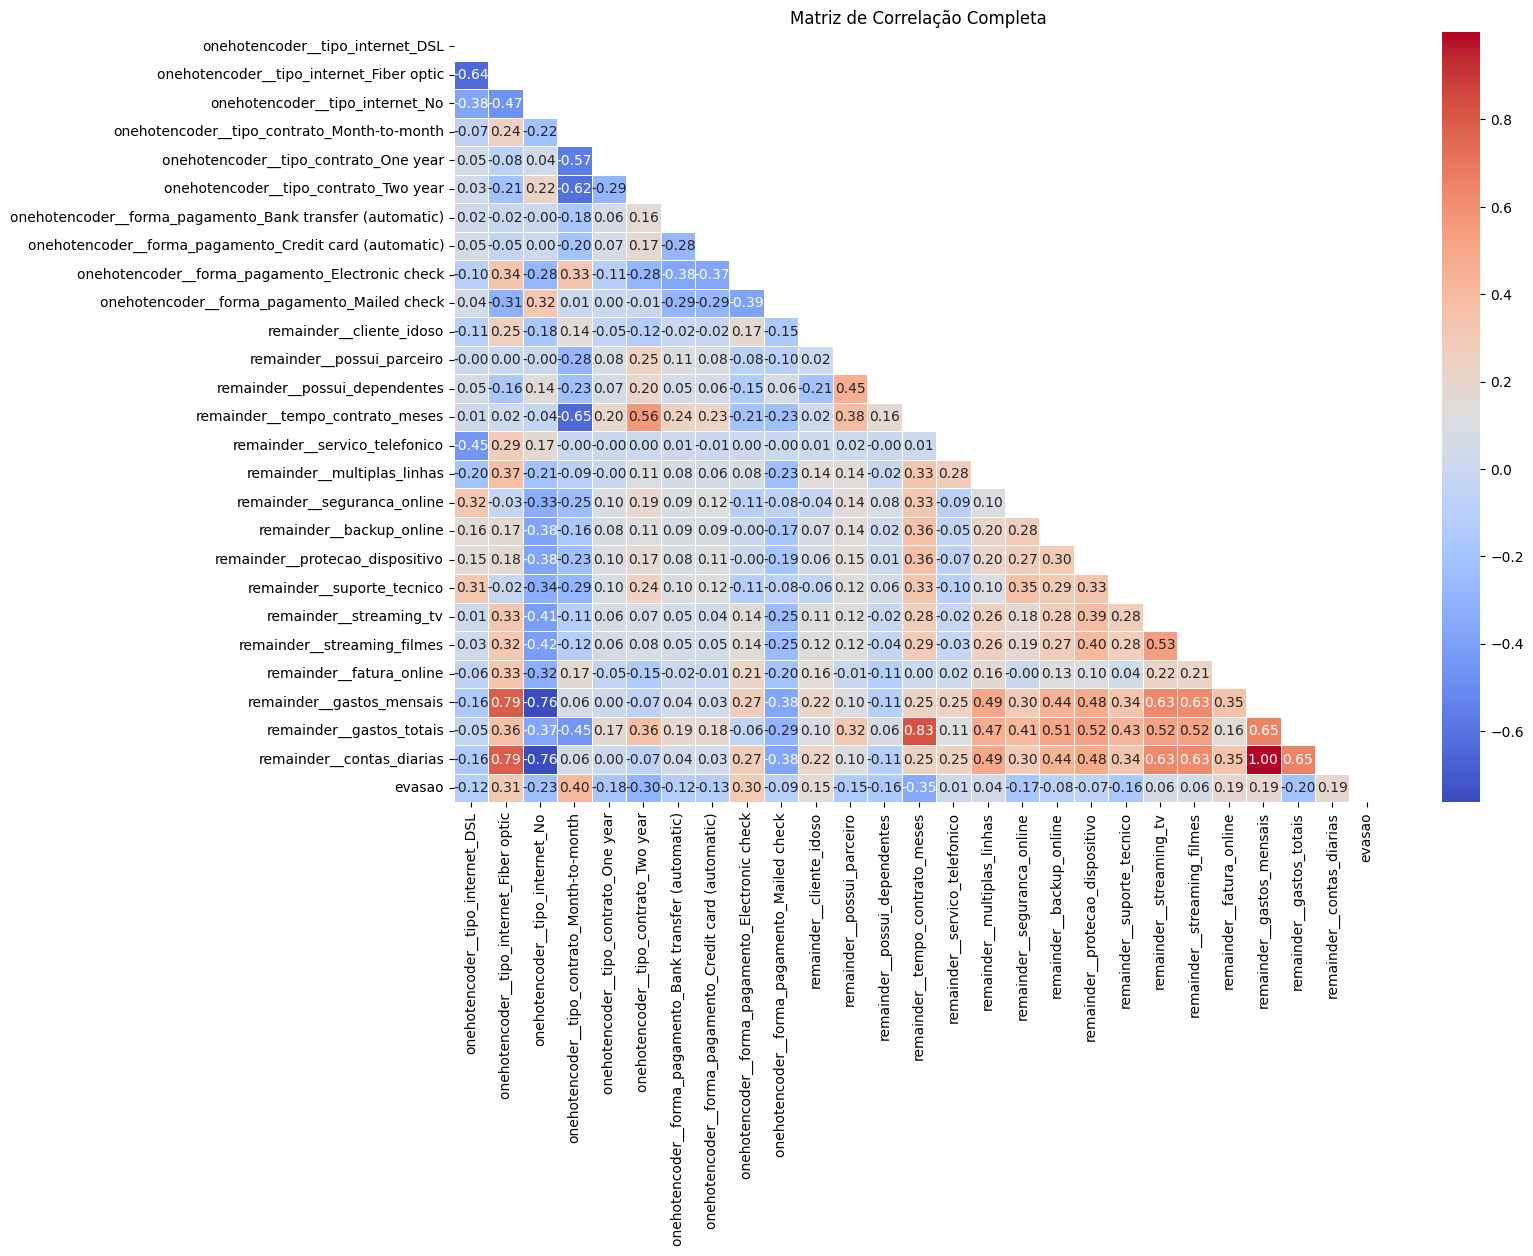

In [35]:
# Adicionando a coluna 'evasao' de volta ao dataframe codificado para a análise de correlação
dados_encoded_full_cor = pd.DataFrame(x_encoded, columns=one_hot.get_feature_names_out(colunas))
dados_encoded_full_cor['evasao'] = Y.values # Adiciona a coluna 'evasao'

# Calculando a matriz de correlação
matriz_correlacao_full = dados_encoded_full_cor.corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(15, 10))
sns.heatmap(matriz_correlacao_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=np.triu(np.ones_like(matriz_correlacao_full, dtype=bool)))
plt.title('Matriz de Correlação Completa')
plt.show()

Com base na matriz de correlação, as variáveis que parecem ter menos relação com a evasão de clientes são:

```python
remainder__servico_telefonico (0.01)
remainder__multiplas_linhas (0.04)
remainder__streaming_filmes (0.06)
remainder__streaming_tv (0.06)
onehotencoder__forma_pagamento_Mailed check (-0.09)
remainder__backup_online (-0.08)
remainder__protecao_dispositivo (-0.07)
```

Essas variáveis apresentam coeficientes de correlação próximos de zero, indicando uma relação linear muito fraca ou inexistente com a evasão.

Vamos remover essas informação que irão treinar nossos futuros modelos, pois elas muito provavelmente irão mais atrapalhar do que de fato contribuir para a classificação de clientes.

> > #### Identificando e Removendo Variáveis com Baixa Correlação

In [36]:
# Lista de colunas com baixa correlação para remover
colunas_baixa_correlacao = [
    'remainder__servico_telefonico',
    'remainder__multiplas_linhas',
    'remainder__streaming_filmes',
    'remainder__streaming_tv',
    'onehotencoder__forma_pagamento_Mailed check',
    'remainder__backup_online',
    'remainder__protecao_dispositivo'
]

# Remover as colunas com baixa correlação do dataframe codificado
dados_modelo_filtrado = dados_encoded_full_cor.drop(columns=colunas_baixa_correlacao)

# Exibir as primeiras linhas do novo dataframe
display(dados_modelo_filtrado.head())

# Exibir as dimensões do novo dataframe
print("\nDimensões do dataframe após remover colunas com baixa correlação:", dados_modelo_filtrado.shape)

,onehotencoder__tipo_internet_DSL,onehotencoder__tipo_internet_Fiber optic,onehotencoder__tipo_internet_No,onehotencoder__tipo_contrato_Month-to-month,onehotencoder__tipo_contrato_One year,onehotencoder__tipo_contrato_Two year,onehotencoder__forma_pagamento_Bank transfer (automatic),onehotencoder__forma_pagamento_Credit card (automatic),onehotencoder__forma_pagamento_Electronic check,remainder__cliente_idoso,remainder__possui_parceiro,remainder__possui_dependentes,remainder__tempo_contrato_meses,remainder__seguranca_online,remainder__suporte_tecnico,remainder__fatura_online,remainder__gastos_mensais,remainder__gastos_totais,remainder__contas_diarias,evasao
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,65.6,593.30,2.19,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,59.9,542.40,2.00,0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,73.9,280.85,2.46,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,13.0,0.0,0.0,1.0,98.0,1237.85,3.27,1
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.0,1.0,83.9,267.40,2.80,1



Dimensões do dataframe após remover colunas com baixa correlação: (7032, 20)


> ## Verificando desequilibrios na proporção dos dados.

In [37]:
proporcao_evasao = dados['evasao'].value_counts(normalize=True)
print("Proporção de clientes por status de evasão:")
print(proporcao_evasao)

if proporcao_evasao[1] > proporcao_evasao[0]:
  print("\nHá um desequilíbrio, com a classe 'Evasão' sendo a majoritária.")
elif proporcao_evasao[0] > proporcao_evasao[1] * 2:
  print("\nHá um desequilíbrio significativo, com a classe 'Não evadido' sendo majoritária.")
else:
  print("\nAs classes estão relativamente equilibradas.")

Proporção de clientes por status de evasão:
evasao
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Há um desequilíbrio significativo, com a classe 'Não evadido' sendo majoritária.


## Lidando com o Desequilíbrio das Classes com SMOTE
Para tratar o desequilíbrio na variável alvo 'evasao', vamos aplicar a técnica de *Oversampling* utilizando o SMOTE (Synthetic Minority Over-sampling Technique). O SMOTE cria instâncias sintéticas da classe minoritária (clientes que evadiram) para equilibrar o dataset de treino.

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar a variável alvo (y) das variáveis preditoras (X) do dataframe filtrado
X_filtrado = dados_modelo_filtrado.drop(columns='evasao')
y = dados_modelo_filtrado['evasao']

# Dividir os dados em treino (70%), teste (15%) e validação (15%)
# Primeiro, dividimos em treino (70%) e o restante (30%)
X_treino, X_temp, Y_treino, Y_temp = train_test_split(X_filtrado, y, test_size=0.3, random_state=42, stratify=y)

# Em seguida, dividimos o restante (30%) em teste (15%) e validação (15%)
X_teste, X_validacao, Y_teste, Y_validacao = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)


# Aplicar SMOTE apenas nos dados de treino
smote = SMOTE(random_state=42)
X_balanceado_over, Y_balanceado_over = smote.fit_resample(X_treino, Y_treino)

print("Forma dos dados de treino antes do SMOTE:", X_treino.shape)
print("Forma dos dados de treino após SMOTE:", X_balanceado_over.shape)
print("Forma dos dados de validação:", X_validacao.shape)
print("Forma dos dados de teste:", X_teste.shape)

print("\nContagem da classe alvo nos dados de treino antes do SMOTE:\n", Y_treino.value_counts())
print("\nContagem da classe alvo nos dados de treino após SMOTE:\n", Y_balanceado_over.value_counts())
print("\nContagem da classe alvo nos dados de validação:\n", Y_validacao.value_counts())
print("\nContagem da classe alvo nos dados de teste:\n", Y_teste.value_counts())

Forma dos dados de treino antes do SMOTE: (4922, 19)
Forma dos dados de treino após SMOTE: (7228, 19)
Forma dos dados de validação: (1055, 19)
Forma dos dados de teste: (1055, 19)

Contagem da classe alvo nos dados de treino antes do SMOTE:
 evasao
0    3614
1    1308
Name: count, dtype: int64

Contagem da classe alvo nos dados de treino após SMOTE:
 evasao
1    3614
0    3614
Name: count, dtype: int64

Contagem da classe alvo nos dados de validação:
 evasao
0    775
1    280
Name: count, dtype: int64

Contagem da classe alvo nos dados de teste:
 evasao
0    774
1    281
Name: count, dtype: int64


## Escalonamento dos Dados

Vamos aplicar o `StandardScaler` para padronizar as variáveis numéricas. Isso é importante para algoritmos que são sensíveis à escala das features, como muitos modelos baseados em distância ou gradiente.

Aplicaremos o `fit_transform` apenas nos dados de treino para aprender os parâmetros de escala (média e desvio padrão) e depois usaremos `transform` nos dados de validação e teste para aplicar a mesma transformação.

In [39]:
from sklearn.preprocessing import StandardScaler

# Lista de colunas numéricas para escalar
num_cols_to_scale = ['remainder__tempo_contrato_meses', 'remainder__gastos_mensais', 'remainder__gastos_totais', 'remainder__contas_diarias']

scaler = StandardScaler()

# Aplicar o escalonamento nos dados de treino balanceados
X_balanceado_over_scaled = scaler.fit_transform(X_balanceado_over[num_cols_to_scale])

# Aplicar o mesmo escalonamento nos dados de validação e teste
X_validacao_scaled = scaler.transform(X_validacao[num_cols_to_scale])
X_teste_scaled = scaler.transform(X_teste[num_cols_to_scale])

# Substituir as colunas numéricas originais pelas colunas escalonadas nos dataframes

# Para os dados de treino balanceados
X_balanceado_over[num_cols_to_scale] = X_balanceado_over_scaled

# Para os dados de validação
X_validacao[num_cols_to_scale] = X_validacao_scaled

# Para os dados de teste
X_teste[num_cols_to_scale] = X_teste_scaled


print("Primeiras linhas dos dados de treino balanceados e escalonados:")
display(X_balanceado_over[num_cols_to_scale].head())

print("\nPrimeiras linhas dos dados de validação escalonados:")
display(X_validacao[num_cols_to_scale].head())

print("\nPrimeiras linhas dos dados de teste escalonados:")
display(X_teste[num_cols_to_scale].head())

Primeiras linhas dos dados de treino balanceados e escalonados:


,remainder__tempo_contrato_meses,remainder__gastos_mensais,remainder__gastos_totais,remainder__contas_diarias
0,-0.446498,0.856794,-0.241644,0.851418
1,0.879946,-1.671612,-0.511092,-1.669724
2,-0.861012,-1.661150,-0.862693,-1.659263
3,1.087203,0.769608,1.313457,0.767729
4,1.750425,1.256108,2.368648,1.259404



Primeiras linhas dos dados de validação escalonados:


,remainder__tempo_contrato_meses,remainder__gastos_mensais,remainder__gastos_totais,remainder__contas_diarias
2804,1.335911,-0.635837,0.465814,-0.634068
745,1.170105,1.109635,1.579104,1.112947
153,1.004300,0.467943,1.050678,0.464355
3560,0.465432,-0.600963,-0.015755,-0.602685
4664,-0.114887,0.731246,0.111595,0.736345



Primeiras linhas dos dados de teste escalonados:


,remainder__tempo_contrato_meses,remainder__gastos_mensais,remainder__gastos_totais,remainder__contas_diarias
2120,-0.778109,-1.512933,-0.844714,-1.512807
2075,0.506883,0.229052,0.441372,0.223748
2521,1.004300,-1.696024,-0.461663,-1.701108
5675,0.631238,0.776583,0.815958,0.778190
2286,-1.109721,0.246489,-0.897079,0.244670


## Métricas de Avaliação para Modelos de Classificação





Vamos revisar as principais métricas:

1.  **Acurácia (Accuracy)**:
    *   **O que mede:** A proporção de previsões corretas (tanto positivos quanto negativos verdadeiros) em relação ao total de instâncias.
    *   **Como interpretar:** Uma acurácia alta significa que o modelo acertou a maioria das suas previsões.
    *   **Valores bons/ruins:** Valores próximos a 1.0 (ou 100%) são ideais. **Cuidado em datasets desbalanceados!** Uma acurácia alta pode ser enganosa se o modelo apenas prever a classe majoritária.



2.  **Precisão (Precision)**:
    *   **O que mede:** A proporção de verdadeiros positivos em relação a todas as instâncias que o modelo classificou como positivas (Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivos)). De todas as vezes que o modelo disse que um cliente iria evadir, quantas vezes ele acertou?
    *   **Como interpretar:** Uma precisão alta indica que, quando o modelo prevê evasão, ele geralmente está correto. Importante quando o custo de um Falso Positivo é alto.
    *   **Valores bons/ruins:** Valores próximos a 1.0 são bons. Uma precisão baixa significa muitos falsos positivos.



3.  **Recall (Revocação ou Sensibilidade)**:
    *   **O que mede:** A proporção de verdadeiros positivos em relação a todas as instâncias que *realmente* são positivas (Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)). De todos os clientes que *realmente* evadiram, quantos o modelo conseguiu identificar corretamente?
    *   **Como interpretar:** Um recall alto indica que o modelo é bom em encontrar todas as instâncias positivas. Importante quando o custo de um Falso Negativo é alto (perder um cliente que ia evadir).
    *   **Valores bons/ruins:** Valores próximos a 1.0 são bons. Um recall baixo significa que o modelo perdeu muitos verdadeiros positivos (muitos falsos negativos).



4. **F1-Score:**

* **O que mede:** A média harmônica da Precisão e do Recall. Ele tenta encontrar um equilíbrio entre as duas métricas.

* **Como interpretar:** O F1-Score é útil quando você quer um balanço entre precisão e Recall, especialmente em problemas com classes desbalanceadas. Um valor alto indica um bom desempenho tanto na identificação correta dos positivos quanto na minimização de falsos positivos e falsos negativos.

* **Valores bons/ruins:** Valores próximos a 1.0 são bons.

5. **ROC-AUC (Receiver Operating Characteristic - Area Under the Curve):**

* **O que mede:** A capacidade do modelo de distinguir entre as classes. É a área sob a curva ROC, que plota a Taxa de Verdadeiros Positivos (Recall) contra a Taxa de Falsos Positivos em vários limiares de classificação.

* **Como interpretar:** Um valor de ROC-AUC próximo a 1.0 indica que o modelo tem uma excelente capacidade de separar as classes. Um valor de 0.5 indica que o modelo está se saindo tão bem quanto um chute aleatório (como o DummyClassifier estratificado, que geralmente terá um ROC-AUC próximo de 0.5). Valores abaixo de 0.5 indicam que o modelo é pior que um chute aleatório e pode haver um problema sério.

* **Valores bons/ruins:** Valores acima de 0.7 ou 0.8 geralmente são considerados bons, dependendo do domínio do problema. Valores mais próximos de 1.0 são excelentes.

>> ### Funções para a criação dos modelos de classificação

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_and_metrics(y_true, y_pred, y_proba, dataset_name):
    """
    Calcula e imprime as métricas de avaliação para um modelo de classificação.

    Args:
        y_true (array-like): Rótulos verdadeiros.
        y_pred (array-like): Rótulos previstos pelo modelo.
        y_proba (array-like): Probabilidades previstas para a classe positiva.
        dataset_name (str): Nome do conjunto de dados (ex: "Treino", "Validação", "Teste").
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    # O ROC-AUC precisa das probabilidades, não apenas das previsões binárias
    roc_auc = roc_auc_score(y_true, y_proba)

    print(f"Resultados no Conjunto de {dataset_name}:")
    print(f"  Acurácia: {accuracy:.4f}")
    print(f"  Precisão: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC-AUC: {roc_auc:.4f}")
    print("-" * 30) # Separador para clareza

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

def plot_performance(model, X, y_true, model_name, dataset_name):
    """
    Gera e plota a Matriz de Confusão, Curva ROC e Curva Precisão-Recall
    para um modelo de classificação, plotadas lado a lado.

    Args:
        model: O modelo de classificação treinado.
        X (DataFrame/array-like): As features para avaliação.
        y_true (array-like): Os rótulos verdadeiros para avaliação.
        model_name (str): Nome do modelo (ex: "KNN", "Árvore de Decisão").
        dataset_name (str): Nome do conjunto de dados (ex: "Validação", "Teste").
    """

    # Previsões e probabilidades necessárias para os gráficos
    y_pred = model.predict(X)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X)[:, 1]
    else:
        y_proba = y_pred


    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Matriz de Confusão no primeiro subplot
    cm = confusion_matrix(y_true, y_pred)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Evadido', 'Evasão'])
    disp_cm.plot(ax=axes[0], cmap='Blues', values_format='d')
    axes[0].set_title(f'Matriz de Confusão - {model_name} ({dataset_name})')

    # Curva ROC no segundo subplot

    roc_display = RocCurveDisplay.from_estimator(model, X, y_true, ax=axes[1], name=model_name)
    axes[1].set_title(f'Curva ROC - {model_name} ({dataset_name})')

    # Curva Precisão-Recall no terceiro subplot
    pr_display = PrecisionRecallDisplay.from_estimator(model, X, y_true, ax=axes[2], name=model_name)
    axes[2].set_title(f'Curva Precisão-Recall - {model_name} ({dataset_name})')

    plt.tight_layout()
    plt.show()

# Treinando Modelos!

## Criando a Baseline com `DummyClassifier`

Vamos estabelecer uma baseline utilizando o `DummyClassifier`. Este classificador faz previsões simples, geralmente baseadas na estratégia mais frequente ou aleatória. Ele serve como um ponto de referência para sabermos se nossos modelos mais complexos estão realmente aprendendo algo útil.



In [42]:
from sklearn.dummy import DummyClassifier

Resultados no Conjunto de Treino (Baseline):
  Acurácia: 0.4979
  Precisão: 0.4979
  Recall: 0.5008
  F1-Score: 0.4994
  ROC-AUC: 0.4979
------------------------------
Resultados no Conjunto de Validação (Baseline):
  Acurácia: 0.5280
  Precisão: 0.2920
  Recall: 0.5464
  F1-Score: 0.3806
  ROC-AUC: 0.5339
------------------------------
Resultados no Conjunto de Teste (Baseline):
  Acurácia: 0.5137
  Precisão: 0.2786
  Recall: 0.5196
  F1-Score: 0.3627
  ROC-AUC: 0.5156
------------------------------


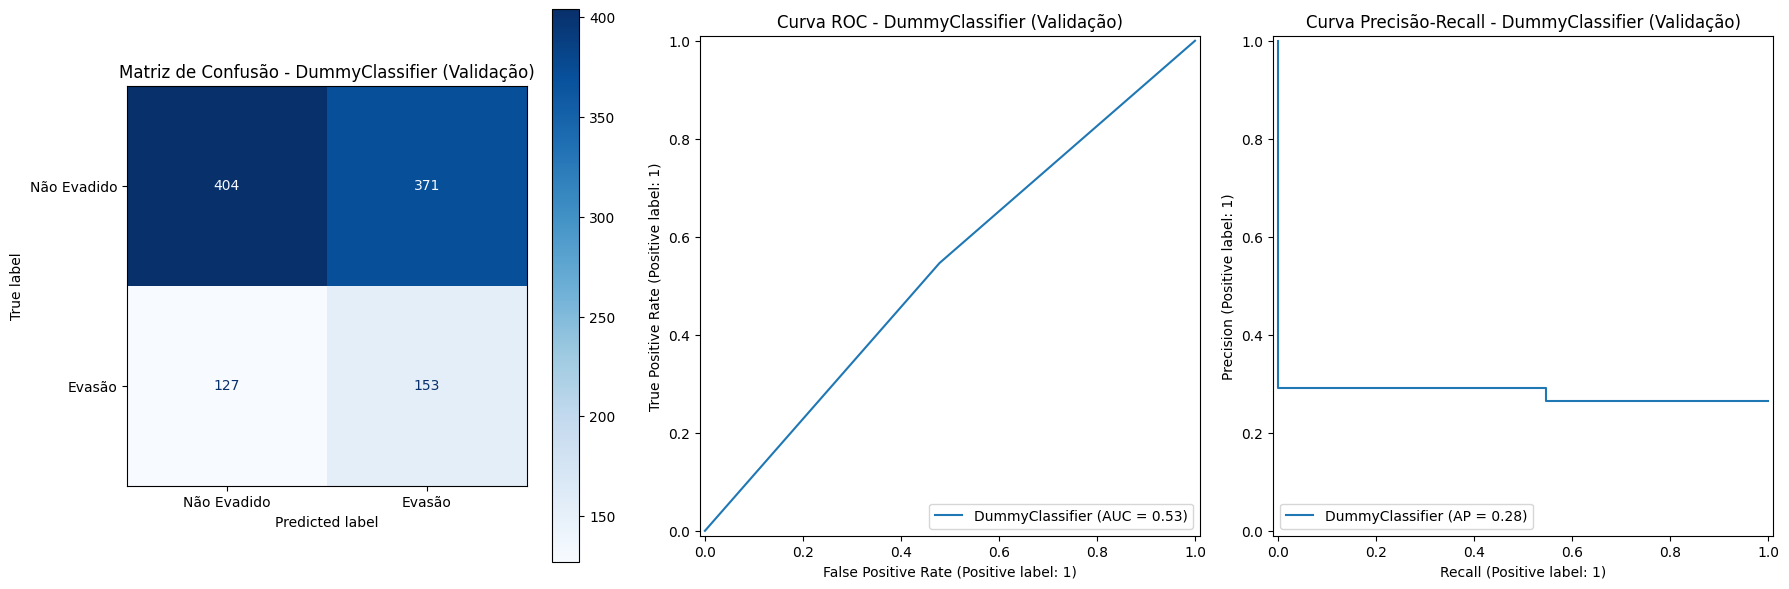

In [43]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

# Treinar o modelo nos dados de treino balanceados e escalonados
dummy_clf.fit(X_balanceado_over, Y_balanceado_over)

# --- Avaliação no Conjunto de TREINO (Balanceado) ---
y_pred_train_dummy = dummy_clf.predict(X_balanceado_over)
y_proba_train_dummy = dummy_clf.predict_proba(X_balanceado_over)[:, 1] # Probabilidades para ROC-AUC
evaluate_and_metrics(Y_balanceado_over, y_pred_train_dummy, y_proba_train_dummy, "Treino (Baseline)")

# --- Avaliação no Conjunto de VALIDAÇÃO ---
# X_validacao e Y_validacao já são os DataFrames/Series corretos
y_pred_val_dummy = dummy_clf.predict(X_validacao)
y_proba_val_dummy = dummy_clf.predict_proba(X_validacao)[:, 1] # Probabilidades para ROC-AUC
evaluate_and_metrics(Y_validacao, y_pred_val_dummy, y_proba_val_dummy, "Validação (Baseline)")

# --- Avaliação no Conjunto de TESTE ---
# X_teste e Y_teste já são os DataFrames/Series corretos
y_pred_test_dummy = dummy_clf.predict(X_teste)
y_proba_test_dummy = dummy_clf.predict_proba(X_teste)[:, 1] # Probabilidades para ROC-AUC
evaluate_and_metrics(Y_teste, y_pred_test_dummy, y_proba_test_dummy, "Teste (Baseline)")

# Plotar visualizações para o DummyClassifier no conjunto de validação
plot_performance(dummy_clf, X_validacao, Y_validacao, "DummyClassifier", "Validação")

Com o DummyClassifier usando a estratégia 'stratified', o que ele faz é basicamente "chutar" a classe de cada dado com base na proporção das classes no conjunto de treino.

A principal conclusão é que o DummyClassifier nos fornece uma baseline de desempenho. Ele representa o desempenho mínimo aceitável. Qualquer modelo preditivo real que construirmos e treinarmos posteriormente precisa apresentar métricas de desempenho (como Acurácia, Precisão, Recall, F1-Score, ROC-AUC) significativamente melhores do que as obtidas pelo DummyClassifier para ser considerado útil e ter aprendido algo sobre os padrões nos dados que levam à evasão. Aqui temos o claro exemplo de Underfiting!

## Treinando e Avaliando o Modelo KNN

Vamos treinar um classificador K-Nearest Neighbors (KNN). Este é um algoritmo simples e não paramétrico que classifica um ponto de dados com base na maioria das classes de seus 'k' vizinhos mais próximos no espaço de características.

Vamos começar com um valor padrão para 'k' (por exemplo, k=5) e avaliar seu desempenho inicial no conjunto de validação.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

Resultados no Conjunto de Treino (KNN):
  Acurácia: 0.8733
  Precisão: 0.8415
  Recall: 0.9198
  F1-Score: 0.8789
  ROC-AUC: 0.9540
------------------------------
Resultados no Conjunto de Validação (KNN):
  Acurácia: 0.7100
  Precisão: 0.4686
  Recall: 0.6929
  F1-Score: 0.5591
  ROC-AUC: 0.7582
------------------------------


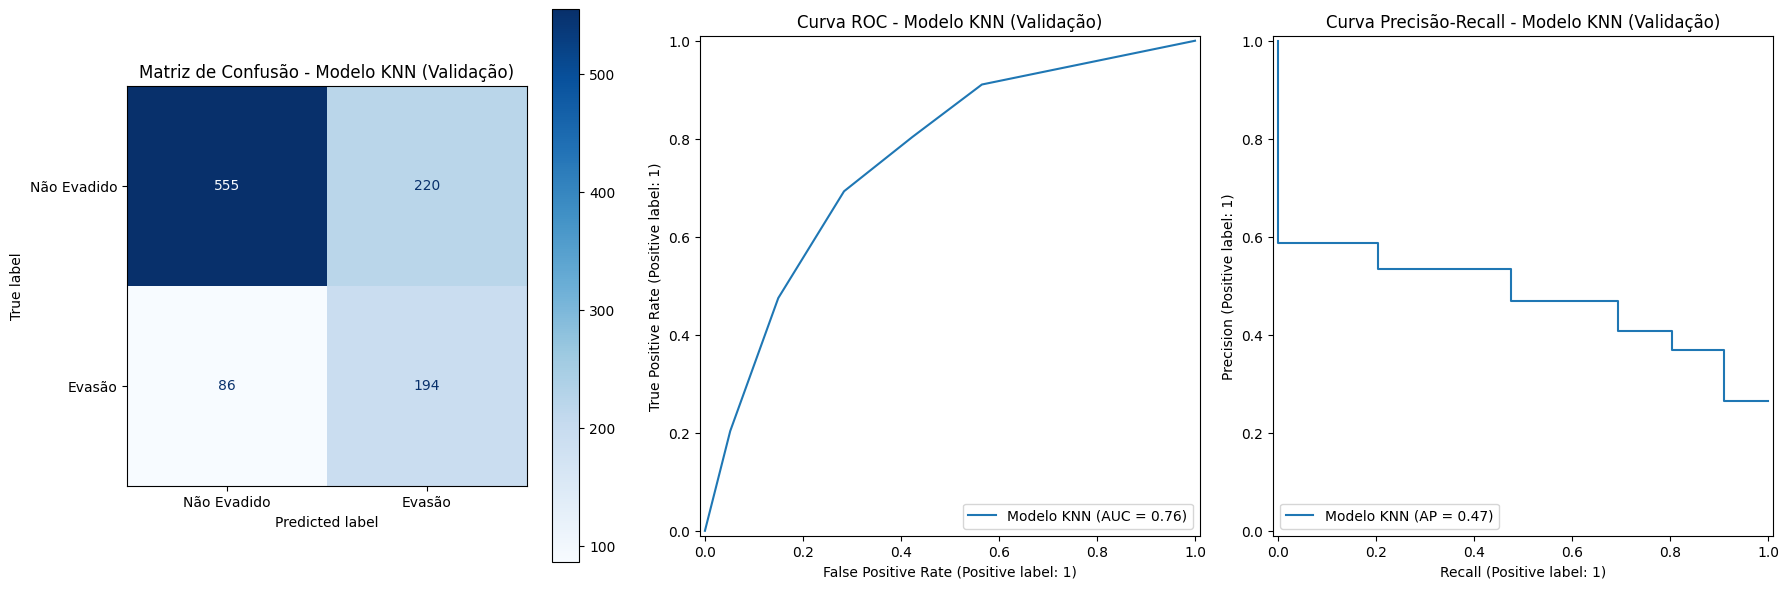

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo nos dados de treino balanceados e escalonados

knn_clf.fit(X_balanceado_over, Y_balanceado_over)

# --- Avaliação no Conjunto de TREINO (Balanceado) ---
y_pred_train_knn = knn_clf.predict(X_balanceado_over)
y_proba_train_knn = knn_clf.predict_proba(X_balanceado_over)[:, 1]
evaluate_and_metrics(Y_balanceado_over, y_pred_train_knn, y_proba_train_knn, "Treino (KNN)")


# --- Avaliação no Conjunto de VALIDAÇÃO ---
y_pred_val_knn = knn_clf.predict(X_validacao)
y_proba_val_knn = knn_clf.predict_proba(X_validacao)[:, 1] # Probabilidades para ROC-AUC
evaluate_and_metrics(Y_validacao, y_pred_val_knn, y_proba_val_knn, "Validação (KNN)")

# Plotar visualizações para o Modelo KNN no conjunto de validação
plot_performance(knn_clf, X_validacao, Y_validacao, "Modelo KNN", "Validação")

Podemos ver nas métricas que obtivemos valores muito melhores do que a nossa baseline, ou seja, utilizar o KNN já agrega ao nosso problema.

O modelo explica bem 71% dos dados e o valor de recall chama atenção, mostrando que temos poucos falsos negativos (clientes que foram classificados como não evasores, mas evadiram).

Porem, a precisão está abaixo, indicando um numero maior de falsos positivos.

A curva ROC-AUC indica que o modelo consegue distinguir bem clientes que evadem ou não.

As métricas no conjunto de treino indicam um overfiting, quando olhamos a queda de rendimento no conjunto de validação. Esse problema pode ser derivado do própio oversample, já que o KNN depende muito dos dados próximo da sua realidade, se escolhermos esse modelo, vai ser necessário voltar os dados na sua proporção original para confirmar essa possibilidade.   

## Treinando e Avaliando o Modelo de Árvore de Decisão

Vamos agora treinar um classificador de Árvore de Decisão. Este modelo divide os dados com base em regras aprendidas das características, criando uma estrutura em forma de árvore. As Árvores de Decisão são fáceis de interpretar, mas podem ser propensas a overfitting.

In [46]:
from sklearn.tree import DecisionTreeClassifier

Resultados no Conjunto de Treino (Árvore de Decisão):
  Acurácia: 0.8950
  Precisão: 0.8934
  Recall: 0.8971
  F1-Score: 0.8952
  ROC-AUC: 0.9658
------------------------------
Resultados no Conjunto de Validação (Árvore de Decisão):
  Acurácia: 0.7555
  Precisão: 0.5367
  Recall: 0.5750
  F1-Score: 0.5552
  ROC-AUC: 0.7624
------------------------------


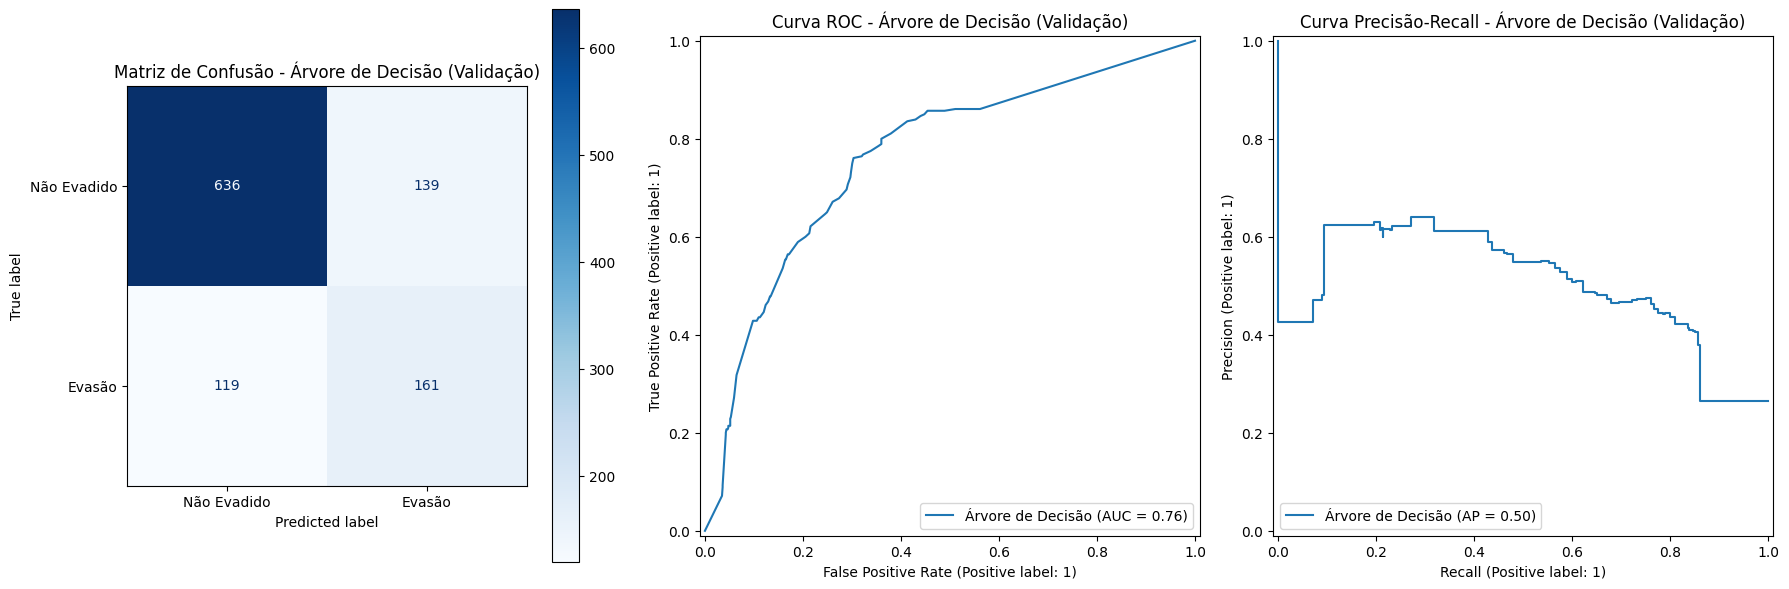

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=10, random_state=42)

# Treinar o modelo nos dados de treino balanceados e escalonados
dt_clf.fit(X_balanceado_over, Y_balanceado_over)

# --- Avaliação no Conjunto de TREINO (Balanceado) ---
y_pred_train_dt = dt_clf.predict(X_balanceado_over)
y_proba_train_dt = dt_clf.predict_proba(X_balanceado_over)[:, 1]
evaluate_and_metrics(Y_balanceado_over, y_pred_train_dt, y_proba_train_dt, "Treino (Árvore de Decisão)")


# --- Avaliação no Conjunto de VALIDAÇÃO ---
y_pred_val_dt = dt_clf.predict(X_validacao)
y_proba_val_dt = dt_clf.predict_proba(X_validacao)[:, 1] # Probabilidades para ROC-AUC
evaluate_and_metrics(Y_validacao, y_pred_val_dt, y_proba_val_dt, "Validação (Árvore de Decisão)")

# Plotar visualizações para o Modelo de Árvore de Decisão no conjunto de validação
plot_performance(dt_clf, X_validacao, Y_validacao, "Árvore de Decisão", "Validação")

* O modelo de Árvore de Decisão, mesmo com max_depth=7, ainda mostra sinais de overfitting, mas a limitação da profundidade ajudou a controlá-lo significativamente em comparação com uma árvore sem restrições.

* Ele é um classificador muito melhor que a baseline DummyClassifier.

* Seu desempenho na validação é comparável ao do KNN em termos gerais (ROC-AUC similar, F1-Score similar), mas com um trade-off diferente entre Precisão e Recall: a Árvore de Decisão é mais precisa (menos falsos positivos) às custas de um Recall menor (mais falsos negativos) em comparação com o KNN (com k=5).

## Treinando e Avaliando o Modelo Random Forest

Vamos agora treinar um classificador Random Forest. Este modelo constrói múltiplas árvores de decisão durante o treinamento e produz a classe que é a moda das classes (classificação) ou a previsão média (regressão) das árvores individuais. Random Forests geralmente melhoram a acurácia e controlam o overfitting em comparação com uma única árvore de decisão.

In [48]:
from sklearn.ensemble import RandomForestClassifier

Resultados no Conjunto de Treino (Random Forest):
  Acurácia: 0.8654
  Precisão: 0.8463
  Recall: 0.8929
  F1-Score: 0.8690
  ROC-AUC: 0.9419
------------------------------
Resultados no Conjunto de Validação (Random Forest):
  Acurácia: 0.7782
  Precisão: 0.5642
  Recall: 0.7214
  F1-Score: 0.6332
  ROC-AUC: 0.8372
------------------------------


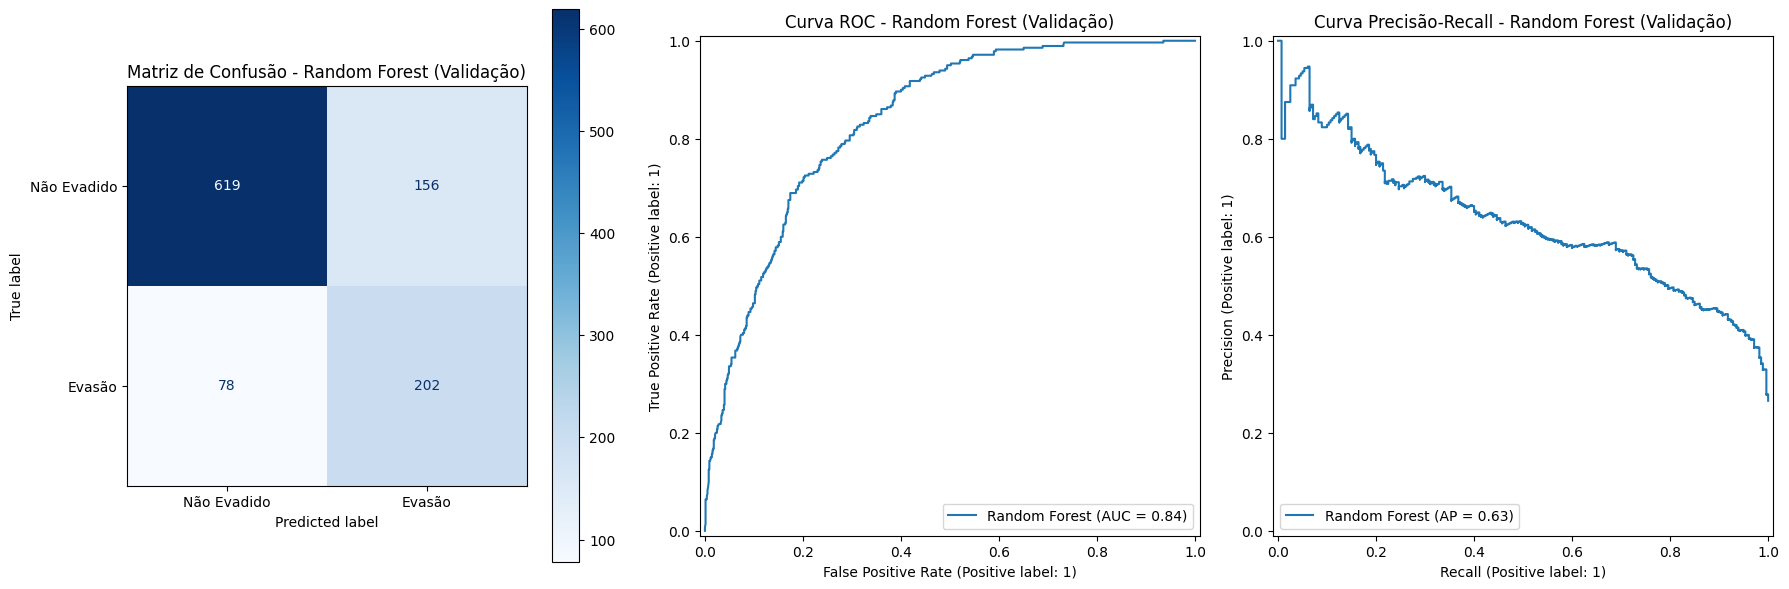

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=7, random_state=42)

# Treinar o modelo nos dados de treino balanceados e escalonados
rf_clf.fit(X_balanceado_over, Y_balanceado_over)

# --- Avaliação no Conjunto de TREINO (Balanceado) ---
y_pred_train_rf = rf_clf.predict(X_balanceado_over)
y_proba_train_rf = rf_clf.predict_proba(X_balanceado_over)[:, 1]
evaluate_and_metrics(Y_balanceado_over, y_pred_train_rf, y_proba_train_rf, "Treino (Random Forest)")

# --- Avaliação no Conjunto de VALIDAÇÃO ---
# X_validacao e Y_validacao já são os DataFrames/Series corretos
y_pred_val_rf = rf_clf.predict(X_validacao)
y_proba_val_rf = rf_clf.predict_proba(X_validacao)[:, 1] # Probabilidades para ROC-AUC
evaluate_and_metrics(Y_validacao, y_pred_val_rf, y_proba_val_rf, "Validação (Random Forest)")


# Plotar visualizações para o Modelo Random Forest no conjunto de validação
plot_performance(rf_clf, X_validacao, Y_validacao, "Random Forest", "Validação")

* O modelo Random Forest, mesmo com algum overfitting (evidenciado pela diferença treino/validação), demonstrou um desempenho superior no conjunto de validação em comparação tanto com a baseline quanto com os modelos KNN e Árvore de Decisão (com as configurações atuais).

* Ele conseguiu um ótimo balanço entre Precisão e Recall (refletido no F1-Score mais alto) e a melhor capacidade de discriminação entre as classes (evidenciada pelo ROC-AUC mais alto) entre os modelos avaliados até agora na validação.

* Apesar do overfitting no treino, o Random Forest generalizou melhor para os dados de validação do que o KNN e a Árvore de Decisão, provavelmente devido à sua natureza de ensemble.

# Escolhendo o modelo!

Pensando em identificar clientes que vão evadir para tentar retê-los, o custo de um Falso Negativo é alto: você perde a oportunidade de reter um cliente que estava propenso a sair. Por outro lado, um Falso Positivo (classificar um cliente que não ia evadir como evasor) pode levar a esforços de retenção desnecessários, mas o custo geralmente é menor do que perder um cliente valioso.

Dessa forma, as métricas mais confiáveis que vai ajudar a selecionar o problema da empresa são:

1.   Recall: Pois como ja vimos é uma métrica importante quando falsos negativos tem custo alto.
2.   ROC-AUC: Pois traz uma ideia da capacidade do modelo em distinguir entre as classes de evasão.
3.   Precisão: Nesse caso, é menos impactante, pois o custo de um falso positivo não é muito alto.
4.   Em um mundo ideal, estamos buscando um bom valor para F1-Score, porém um bom valor de recall e ROC-AUC já são o suficiente para escolhermos nosso modelo.



Dito isso, avaliando as métricas, a conclusão que fica é que o modelo `RandomForest` é o mais promissor para fazer a predição dos clientes podem evadir ou não. Sendo assim, a partir de agora vamos seguir apenas com ele e buscar fazer otimizações.



# Treinando um modelo RandomForest

## Criando um pipeline para um modelo de RandomForest


Agora vamos repetir de certa forma tudo que ja fizemos nesse notebook python, contudo, vamos utilizar um pipeline que funciona como um manual de instruções para o modelo executar todas as partes de uma vez  

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# dados_modelo foi criado removendo 'id_cliente' e 'genero' do dataframe original
# X e y serão definidos a partir de dados_modelo

X = dados_modelo.drop(columns='evasao')
y = dados_modelo['evasao']

# Dividir os dados em treino (60%), validação (20%) e teste (20%) a partir de X e y
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Identificar colunas categóricas e numéricas originais
# agora serão tratadas pelo scaler no pipeline.
categorical_features = X.select_dtypes(include='object').columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Criar o pré-processador usando ColumnTransformer
# Aplica OneHotEncoder nas colunas categóricas e StandardScaler nas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

# Criar o pipeline completo com o pré-processador e o classificador Random Forest
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=7, random_state=42)) # Usando o melhor modelo encontrado com o max_depth inicial
])

# Exibir o pipeline criado
print("Pipeline criado:")
display(pipeline)

Pipeline criado:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['tipo_internet',
                                                   'tipo_contrato',
                                                   'forma_pagamento']),
                                                 ('num', StandardScaler(),
                                                  ['cliente_idoso',
                                                   'possui_parceiro',
                                                   'possui_dependentes',
                                                   'tempo_contrato_meses',
                                                   'servico_telefonico',
                                                   'multiplas_linhas',
                                                   'seguranca_online',
                                                   'backup_online',
                                                   'protecao_dispositivo',
                                                   'suporte_tecnico',
                                                   'streaming_tv',
                                                   'streaming_filmes',
                                                   'fatura_online',
                                                   'gastos_mensais',
                                                   'gastos_totais',
                                                   'contas_diarias'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=7, random_state=42))])

## Buscando os melhores hiperparâmetros, utiizando validação cruzada com o randomizedSearchCV

In [51]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV

# Adicionando o smote para balancear os dados do conjunto treino
pipeline_with_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir o espaço de hiperparâmetros para busca
param_dist_with_smote = {
    'classifier__n_estimators': np.arange(100, 1001, 100),
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': np.arange(2, 21, 2),
    'classifier__min_samples_leaf': np.arange(1, 21, 2),
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['gini', 'entropy']
}

# Configurar o RandomizedSearchCV
random_search_with_smote_rerun = RandomizedSearchCV(
    pipeline_with_smote,
    param_distributions=param_dist_with_smote,
    n_iter=100,
    cv=5,
    scoring='recall',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Executando RandomizedSearchCV novamente com mais iterações e SMOTE no pipeline (otimizando por Recall)...")

# Executar a busca no conjunto de treino
random_search_with_smote_rerun.fit(X_train, y_train)

print("\nBusca com mais iterações concluída.")

# Exibir os melhores parâmetros encontrados na nova busca
print("\nMelhores hiperparâmetros encontrados (com SMOTE, mais iterações, otimizando Recall):")
display(random_search_with_smote_rerun.best_params_)

# O melhor modelo treinado está disponível em random_search_with_smote_rerun.best_estimator_
best_rf_model_with_smote = random_search_with_smote_rerun.best_estimator_

Executando RandomizedSearchCV novamente com mais iterações e SMOTE no pipeline (otimizando por Recall)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Busca com mais iterações concluída.

Melhores hiperparâmetros encontrados (com SMOTE, mais iterações, otimizando Recall):


{'classifier__n_estimators': np.int64(600),
 'classifier__min_samples_split': np.int64(2),
 'classifier__min_samples_leaf': np.int64(17),
 'classifier__max_depth': 40,
 'classifier__criterion': 'entropy',
 'classifier__bootstrap': True}

Avaliando o melhor modelo Random Forest no conjunto de TREINO balanceado...
Resultados no Conjunto de TREINO (Random Forest Otimizado):
  Acurácia: 0.8122
  Precisão: 0.6200
  Recall: 0.7583
  F1-Score: 0.6822
  ROC-AUC: 0.8900
------------------------------


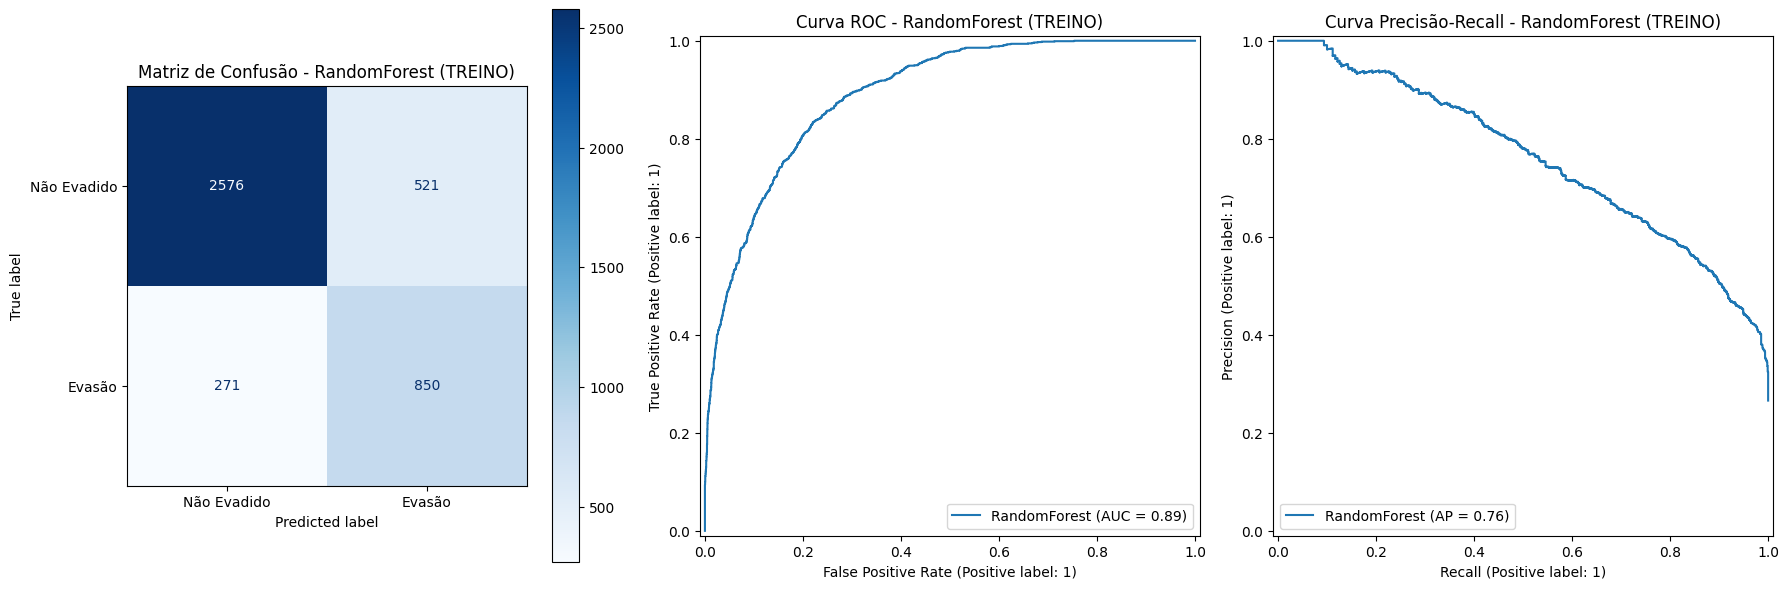


Avaliando o melhor modelo Random Forest no conjunto de VALIDAÇÃO...)
Resultados no Conjunto de Validação (RandomForest):
  Acurácia: 0.7747
  Precisão: 0.5664
  Recall: 0.6497
  F1-Score: 0.6052
  ROC-AUC: 0.8294
------------------------------


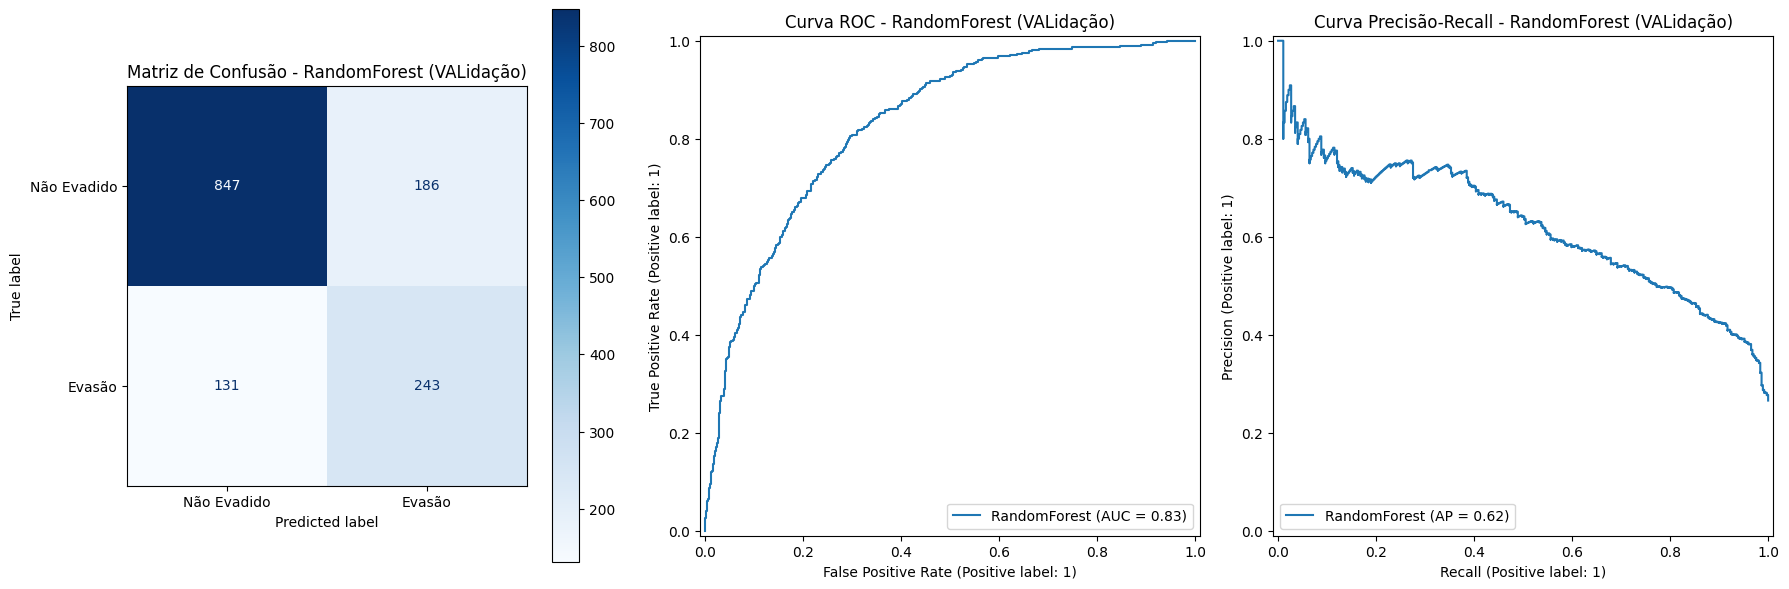

In [52]:
# --- Avaliação no Conjunto de TREINO (Balanceado) ---
print("Avaliando o melhor modelo Random Forest no conjunto de TREINO balanceado...")

y_pred_train_best_rf_smote = best_rf_model_with_smote.predict(X_train)
y_proba_train_best_rf_smote = best_rf_model_with_smote.predict_proba(X_train)[:, 1] # Probabilidades para ROC-AUC

# Calcular e imprimir as métricas de avaliação para o conjunto de treino
evaluate_and_metrics(y_train, y_pred_train_best_rf_smote, y_proba_train_best_rf_smote, "TREINO (Random Forest Otimizado)")

# Plotar visualizações para o melhor modelo Random Forest (com SMOTE) no conjunto de treino
plot_performance(best_rf_model_with_smote, X_train, y_train, "RandomForest", "TREINO")


# --- Avaliação no Conjunto de VALIDAÇÃO ---
print("\nAvaliando o melhor modelo Random Forest no conjunto de VALIDAÇÃO...)")

# Fazer previsões e obter probabilidades no conjunto de validação
# O pipeline aplicará o pré-processamento (sem SMOTE nos dados de validação)
y_pred_val_best_rf_smote = best_rf_model_with_smote.predict(X_val)
y_proba_val_best_rf_smote = best_rf_model_with_smote.predict_proba(X_val)[:, 1] # Probabilidades para ROC-AUC

# Calcular e imprimir as métricas de avaliação para o conjunto de validação
evaluate_and_metrics(y_val, y_pred_val_best_rf_smote, y_proba_val_best_rf_smote, "Validação (RandomForest)")

# Plotar visualizações para o melhor modelo Random Forest no conjunto de validação
plot_performance(best_rf_model_with_smote, X_val, y_val, "RandomForest", "VALidação")

 Treinamos um nomo modelo RandomForest com um pipeline. Porem, mesmo seguindo uma construção mais confiavel, o modelo RandomForest inicial que foi construido, de forma passo a passo na seleção dos modelos, se saiu melhor na classificação.

Uma diferença entre esses dois modelos é que antes, retiramos algumas colunas que possuiam baixissima relação linear com a variável de evasão. Contudo, não fizemos essa remoção no pipeline e isso pode ter causada uma diferença.

## Variáveis com maior importância no primeiro pipeline

Importância das Variáveis:


,Feature,Importance
3,cat__tipo_contrato_Month-to-month,0.176639
8,cat__forma_pagamento_Electronic check,0.135334
13,num__tempo_contrato_meses,0.120866
5,cat__tipo_contrato_Two year,0.086768
24,num__gastos_totais,0.070510
1,cat__tipo_internet_Fiber optic,0.062706
23,num__gastos_mensais,0.054405
25,num__contas_diarias,0.049237
4,cat__tipo_contrato_One year,0.040994
22,num__fatura_online,0.023395


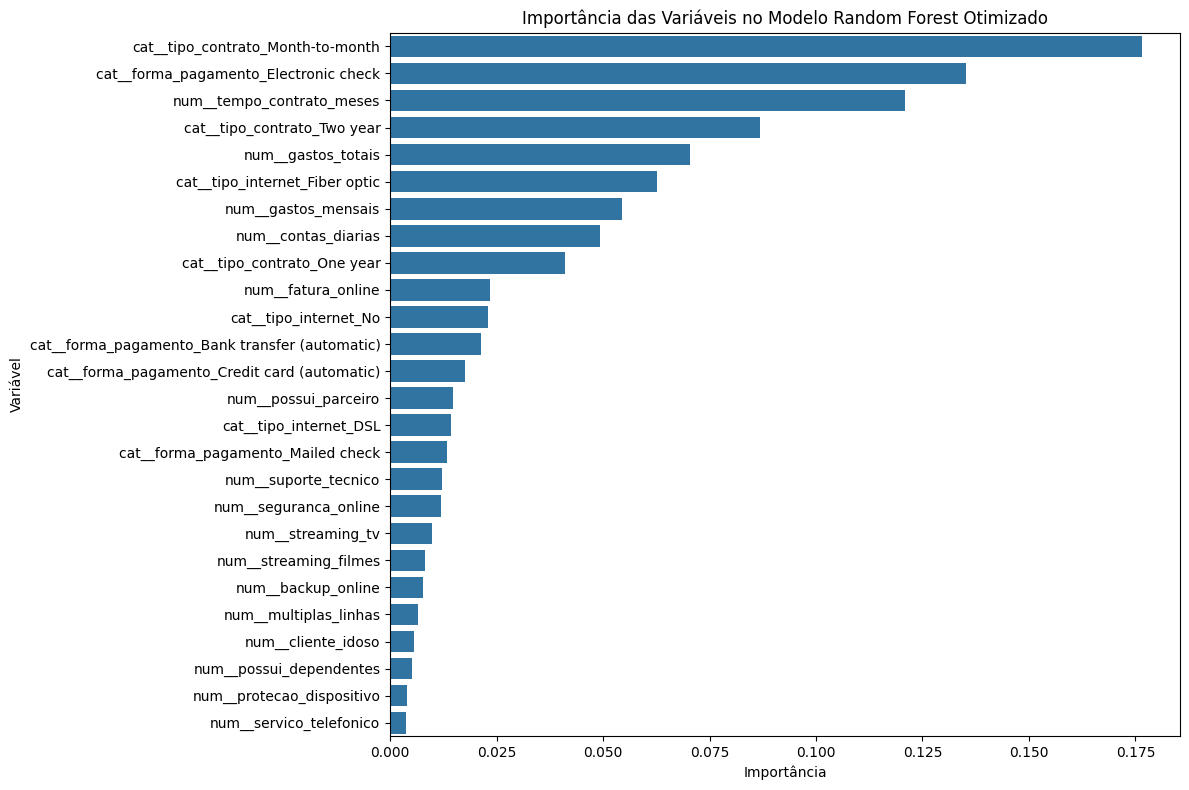

In [53]:
best_pipeline = best_rf_model_with_smote

best_rf_classifier = best_pipeline.named_steps['classifier']

preprocessor = best_pipeline.named_steps['preprocessor']

# Obter os nomes das features após o pré-processamento (OneHotEncoder e StandardScaler)
# Precisamos aplicar o pré-processador a um pequeno conjunto de dados para obter os nomes das colunas transformadas
X_train_processed = preprocessor.transform(X_train)

# Obter os nomes das features transformadas
# O get_feature_names_out() do ColumnTransformer retorna os nomes corretos
feature_names = preprocessor.get_feature_names_out(X_train.columns)

# Extrair a importância das features do modelo Random Forest
feature_importances = best_rf_classifier.feature_importances_

# Criar um DataFrame para visualizar a importância das features
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Ordenar as features por importância em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Exibir o DataFrame com a importância das features
print("Importância das Variáveis:")
display(importance_df)

# Visualizar a importância das features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importância das Variáveis no Modelo Random Forest Otimizado')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

## Vamos criar outro pipeline utilizando a mesma metodologia, porém agora retirando as features que não tiveram muita importância no primeiro pipeline


In [54]:
# Seleção de features antes do pipeline

# O dataframe importance_df já foi calculado
# Ele contém a importância das features TRANSFORMADAS pelo preprocessor original.

# Vamos obter os nomes das top 12 features transformadas
num_top_features = 12
top_features_transformed_names = importance_df['Feature'].head(num_top_features).tolist()

print(f"Top {num_top_features} features transformadas selecionadas para análise:")
print(top_features_transformed_names)


selected_original_features_set = set()
unmapped_transformed_features = []

# Mapear os nomes das features transformadas de volta para os nomes originais
for transformed_name in top_features_transformed_names:
    original_col_name = None
    # Remover prefixos do ColumnTransformer ('cat__', 'num__', 'remainder__')
    parts = transformed_name.split('__')
    if len(parts) > 1:
        transformer_name = parts[0]
        feature_name_without_prefix = '__'.join(parts[1:])

        if transformer_name == 'cat':
            # Para features categóricas one-hot, o nome original é a parte antes do último '_' no nome sem prefixo
            # Ex: 'tipo_internet_Fiber optic' -> 'tipo_internet'
            original_col_name = feature_name_without_prefix.rsplit('_', 1)[0] if '_' in feature_name_without_prefix else feature_name_without_prefix
        elif transformer_name == 'num' or transformer_name == 'remainder':
            # Para features numéricas ou de remainder, o nome sem prefixo é o nome original
            original_col_name = feature_name_without_prefix
        else:
             # Se o prefixo não for reconhecido, usar o nome transformado completo como fallback
             original_col_name = transformed_name
    else:
         # Se não houver prefixo do ColumnTransformer, usar o nome transformado completo como fallback
         original_col_name = transformed_name


    # Verificar se o nome da coluna original existe nas colunas do X_train original
    if original_col_name in X_train.columns:
        selected_original_features_set.add(original_col_name)
    else:
        unmapped_transformed_features.append(transformed_name)
        if transformed_name in X_train.columns:
             selected_original_features_set.add(transformed_name)
        else:
             print(f"Aviso: Feature transformada '{transformed_name}' não mapeada para uma coluna original existente.")


# Converter o set para uma lista
selected_original_features_final = list(selected_original_features_set)

# Garantir que as listas de features selecionadas não estejam vazias
if not selected_original_features_final:
    raise ValueError("Nenhuma feature original foi selecionada. Verifique a lógica de mapeamento e seleção.")


print("\nColunas originais selecionadas para o pipeline (final):")
print(selected_original_features_final)

print("\nFeatures transformadas que não puderam ser mapeadas para colunas originais:", unmapped_transformed_features)


# Filtrar os dataframes de treino, validação e teste para manter apenas as colunas originais selecionadas
X_train_selected = X_train[selected_original_features_final].copy()
X_val_selected = X_val[selected_original_features_final].copy()
X_test_selected = X_test[selected_original_features_final].copy()


print("\nDimensões dos dataframes após seleção de features:")
print("Treino:", X_train_selected.shape)
print("Validação:", X_val_selected.shape)
print("Teste:", X_test_selected.shape)


# Agora, vamos definir o pré-processador e o pipeline para operar neste conjunto REDUZIDO de features originais
# Precisamos identificar quais das colunas selecionadas são categóricas e quais são numéricas/booleanas

categorical_features_selected_final = [col for col in selected_original_features_final if col in X.select_dtypes(include='object').columns.tolist()]
numeric_features_selected_final = [col for col in selected_original_features_final if col in X.select_dtypes(include=['int64', 'float64']).columns.tolist()]

# Adicionar uma verificação para garantir que há features selecionadas para cada tipo
if not categorical_features_selected_final and not numeric_features_selected_final:
     raise ValueError("Nenhuma feature categórica ou numérica foi selecionada para o pré-processador final.")
elif not categorical_features_selected_final:
     print("Aviso: Nenhuma feature categórica foi selecionada para o pré-processador final.")
elif not numeric_features_selected_final:
     print("Aviso: Nenhuma feature numérica foi selecionada para o pré-processador final.")


# Criar o novo pré-processador para o conjunto reduzido de features
# Incluir transformadores apenas se houver features para processar
transformers = []
if categorical_features_selected_final:
    transformers.append(('cat', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), categorical_features_selected_final))
if numeric_features_selected_final:
    transformers.append(('num', StandardScaler(), numeric_features_selected_final))


preprocessor_final = ColumnTransformer(
    transformers=transformers,
    remainder='drop' # Remove quaisquer outras colunas
)

# Criar o pipeline final com o pré-processador, SMOTE e Random Forest


pipeline_final_selected = ImbPipeline(steps=[
    ('preprocessor', preprocessor_final), # Pré-processador para as features selecionadas
    ('smote', SMOTE(random_state=42)), # SMOTE
    ('classifier', RandomForestClassifier(random_state=42)) # Random Forest
])

print("\nPipeline Final com Seleção de Features (Pré-Pipeline) criado:")
display(pipeline_final_selected)

Top 12 features transformadas selecionadas para análise:
['cat__tipo_contrato_Month-to-month', 'cat__forma_pagamento_Electronic check', 'num__tempo_contrato_meses', 'cat__tipo_contrato_Two year', 'num__gastos_totais', 'cat__tipo_internet_Fiber optic', 'num__gastos_mensais', 'num__contas_diarias', 'cat__tipo_contrato_One year', 'num__fatura_online', 'cat__tipo_internet_No', 'cat__forma_pagamento_Bank transfer (automatic)']

Colunas originais selecionadas para o pipeline (final):
['gastos_totais', 'tempo_contrato_meses', 'forma_pagamento', 'tipo_internet', 'contas_diarias', 'gastos_mensais', 'fatura_online', 'tipo_contrato']

Features transformadas que não puderam ser mapeadas para colunas originais: []

Dimensões dos dataframes após seleção de features:
Treino: (4218, 8)
Validação: (1407, 8)
Teste: (1407, 8)

Pipeline Final com Seleção de Features (Pré-Pipeline) criado:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  ['forma_pagamento',
                                                   'tipo_internet',
                                                   'tipo_contrato']),
                                                 ('num', StandardScaler(),
                                                  ['gastos_totais',
                                                   'tempo_contrato_meses',
                                                   'contas_diarias',
                                                   'gastos_mensais',
                                                   'fatura_online'])])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [55]:
# Definir o espaço de hiperparâmetros para busca (mantendo o mesmo espaço)
param_dist_final_selected = {
    'classifier__n_estimators': np.arange(100, 1001, 100),
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': np.arange(2, 21, 2),
    'classifier__min_samples_leaf': np.arange(1, 21, 2),
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['gini', 'entropy']
}

# Configurar o RandomizedSearchCV com o pipeline FINAL e dados FILTRADOS
random_search_final_selected = RandomizedSearchCV(
    pipeline_final_selected, # Usando o pipeline FINAL com seleção de features pré-pipeline
    param_distributions=param_dist_final_selected,
    n_iter=100, # Mantendo 100 iterações
    cv=5,      # Validação cruzada com 5 folds
    scoring='recall', # Otimizando por Recall
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Executando RandomizedSearchCV com pipeline final (seleção de features pré-pipeline, SMOTE, otimizando Recall)...")

# Executar a busca no conjunto de treino FILTRADO
random_search_final_selected.fit(X_train_selected, y_train) # Usar X_train_selected

print("\nBusca com pipeline final concluída.")

# Exibir os melhores parâmetros encontrados
print("\nMelhores hiperparâmetros encontrados (pipeline final com seleção de features pré-pipeline, SMOTE, otimizando Recall):")
display(random_search_final_selected.best_params_)

# O melhor modelo treinado está disponível
best_rf_model_final_selected = random_search_final_selected.best_estimator_


Executando RandomizedSearchCV com pipeline final (seleção de features pré-pipeline, SMOTE, otimizando Recall)...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Busca com pipeline final concluída.

Melhores hiperparâmetros encontrados (pipeline final com seleção de features pré-pipeline, SMOTE, otimizando Recall):


{'classifier__n_estimators': np.int64(500),
 'classifier__min_samples_split': np.int64(14),
 'classifier__min_samples_leaf': np.int64(19),
 'classifier__max_depth': 50,
 'classifier__criterion': 'entropy',
 'classifier__bootstrap': True}

## Avaliando o pipeline final no conjunto treino e validação

Avaliando o melhor modelo Random Forest no conjunto de TREINO balanceado...
Resultados no Conjunto de TREINO (RF otimizado):
  Acurácia: 0.7817
  Precisão: 0.5596
  Recall: 0.8376
  F1-Score: 0.6710
  ROC-AUC: 0.8846
------------------------------


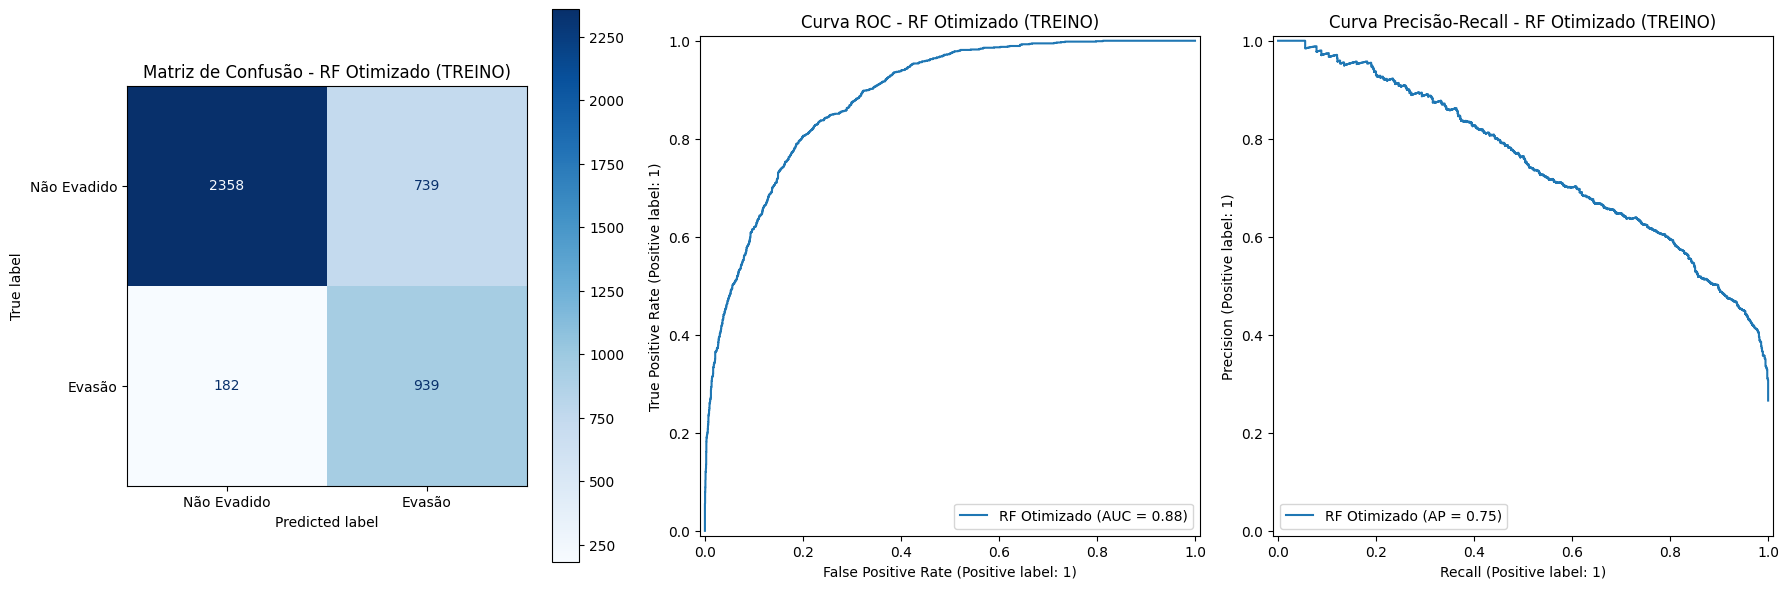


Avaliando o melhor modelo Random Forest no conjunto de Validação...
Resultados no Conjunto de Validação (RF Otimizado):
  Acurácia: 0.7591
  Precisão: 0.5326
  Recall: 0.7647
  F1-Score: 0.6279
  ROC-AUC: 0.8323
------------------------------


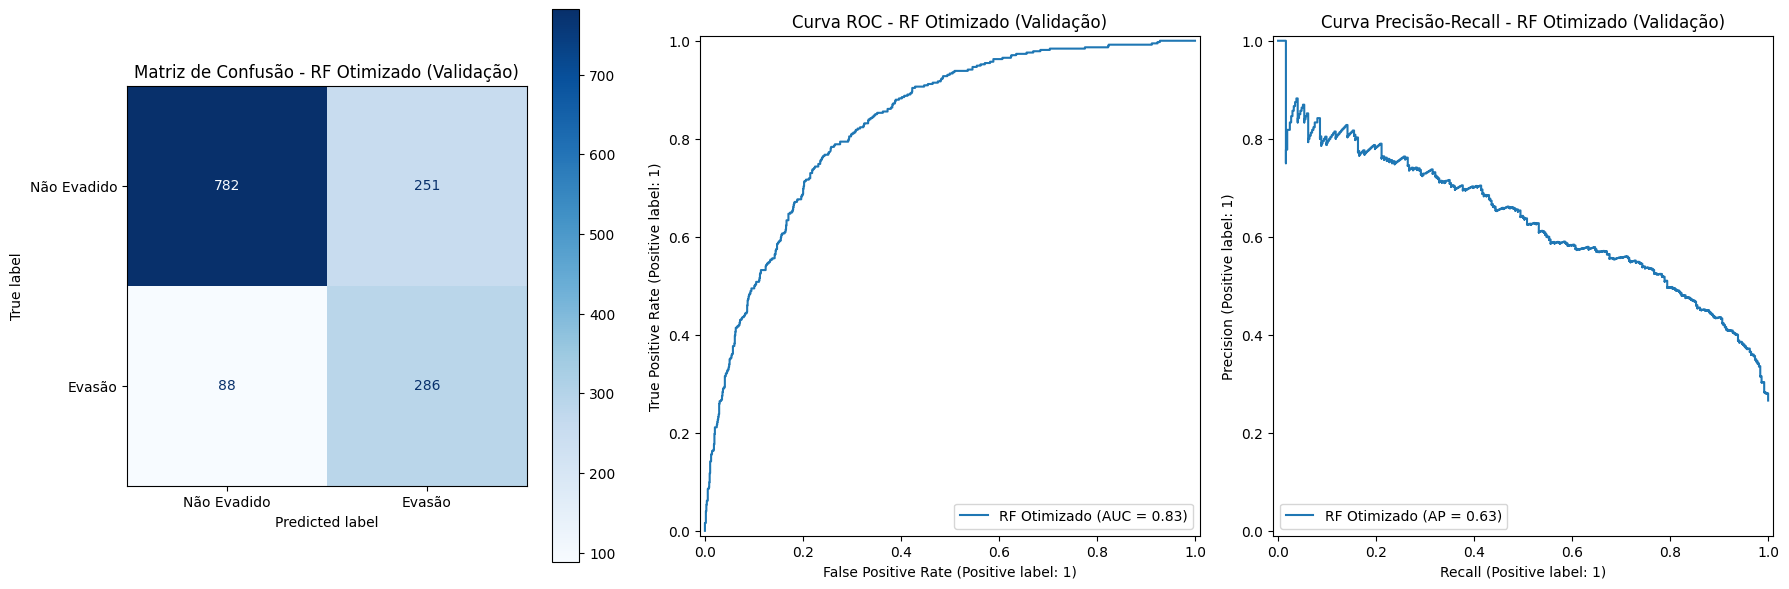

In [56]:
# --- Avaliação no Conjunto de TREINO (Balanceado) ---
print("Avaliando o melhor modelo Random Forest no conjunto de TREINO balanceado...")

# Fazer previsões e obter probabilidades no conjunto de treino FILTRADO
y_pred_train_best_rf_selected = best_rf_model_final_selected.predict(X_train_selected)
y_proba_train_best_rf_selected = best_rf_model_final_selected.predict_proba(X_train_selected)[:, 1] # Probabilidades para ROC-AUC

# Calcular e imprimir as métricas de avaliação
evaluate_and_metrics(y_train, y_pred_train_best_rf_selected, y_proba_train_best_rf_selected, "TREINO (RF otimizado)")

# Plotar visualizações para o melhor modelo
plot_performance(best_rf_model_final_selected, X_train_selected, y_train, "RF Otimizado", "TREINO")


# --- Avaliação no Conjunto de VALIDAÇÃO ---
print("\nAvaliando o melhor modelo Random Forest no conjunto de Validação...")

# Fazer previsões e obter probabilidades no conjunto de validação FILTRADO
y_pred_val_best_rf_selected = best_rf_model_final_selected.predict(X_val_selected)
y_proba_val_best_rf_selected = best_rf_model_final_selected.predict_proba(X_val_selected)[:, 1] # Probabilidades para ROC-AUC

# Calcular e imprimir as métricas de avaliação
evaluate_and_metrics(y_val, y_pred_val_best_rf_selected, y_proba_val_best_rf_selected, "Validação (RF Otimizado)")

# Plotar visualizações para o melhor modelo
plot_performance(best_rf_model_final_selected, X_val_selected, y_val, "RF Otimizado", "Validação")

## Avaliando no conjunto teste


Avaliando o melhor modelo Random Forest no conjunto de Teste...
Resultados no Conjunto de Teste (RF Otimizado):
  Acurácia: 0.7534
  Precisão: 0.5239
  Recall: 0.7914
  F1-Score: 0.6305
  ROC-AUC: 0.8411
------------------------------


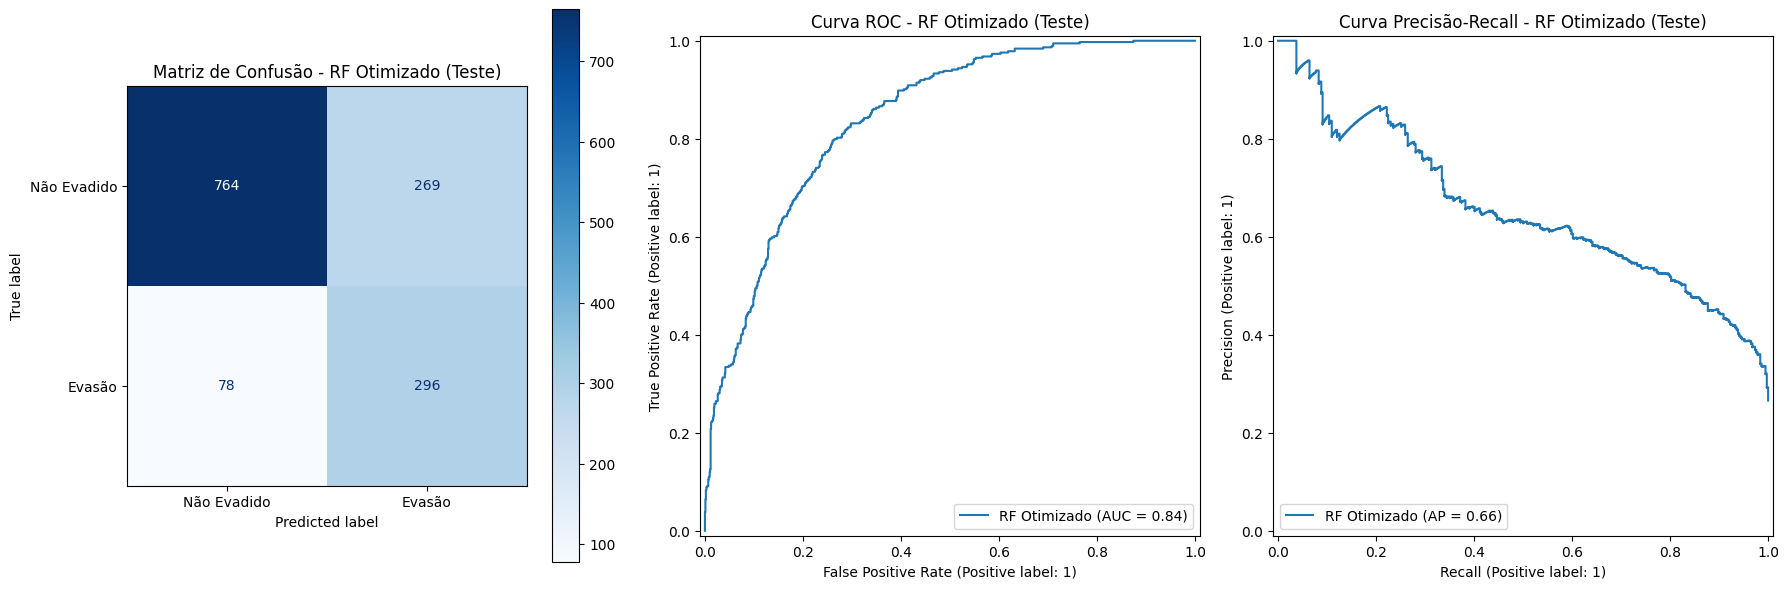

In [57]:
# --- Avaliação no Conjunto de TESTE ---
print("\nAvaliando o melhor modelo Random Forest no conjunto de Teste...")

# Fazer previsões e obter probabilidades no conjunto de teste FILTRADO
y_pred_test_best_rf_selected = best_rf_model_final_selected.predict(X_test_selected)
y_proba_test_best_rf_selected = best_rf_model_final_selected.predict_proba(X_test_selected)[:, 1] # Probabilidades para ROC-AUC

# Calcular e imprimir as métricas de avaliação
evaluate_and_metrics(y_test, y_pred_test_best_rf_selected, y_proba_test_best_rf_selected, "Teste (RF Otimizado)")

# Plotar visualizações para o melhor modelo
plot_performance(best_rf_model_final_selected, X_test_selected, y_test, "RF Otimizado", "Teste")

## Verificando as novas features mais importantes para o pipeline final.

Importância das Variáveis no Modelo Final (com Seleção de Features Pré-Pipeline):


,Feature,Importance
7,cat__tipo_contrato_Month-to-month,0.177205
11,num__tempo_contrato_meses,0.173816
10,num__gastos_totais,0.106676
9,cat__tipo_contrato_Two year,0.105076
13,num__gastos_mensais,0.084239
12,num__contas_diarias,0.077552
2,cat__forma_pagamento_Electronic check,0.070307
5,cat__tipo_internet_Fiber optic,0.068552
8,cat__tipo_contrato_One year,0.036849
6,cat__tipo_internet_No,0.035999


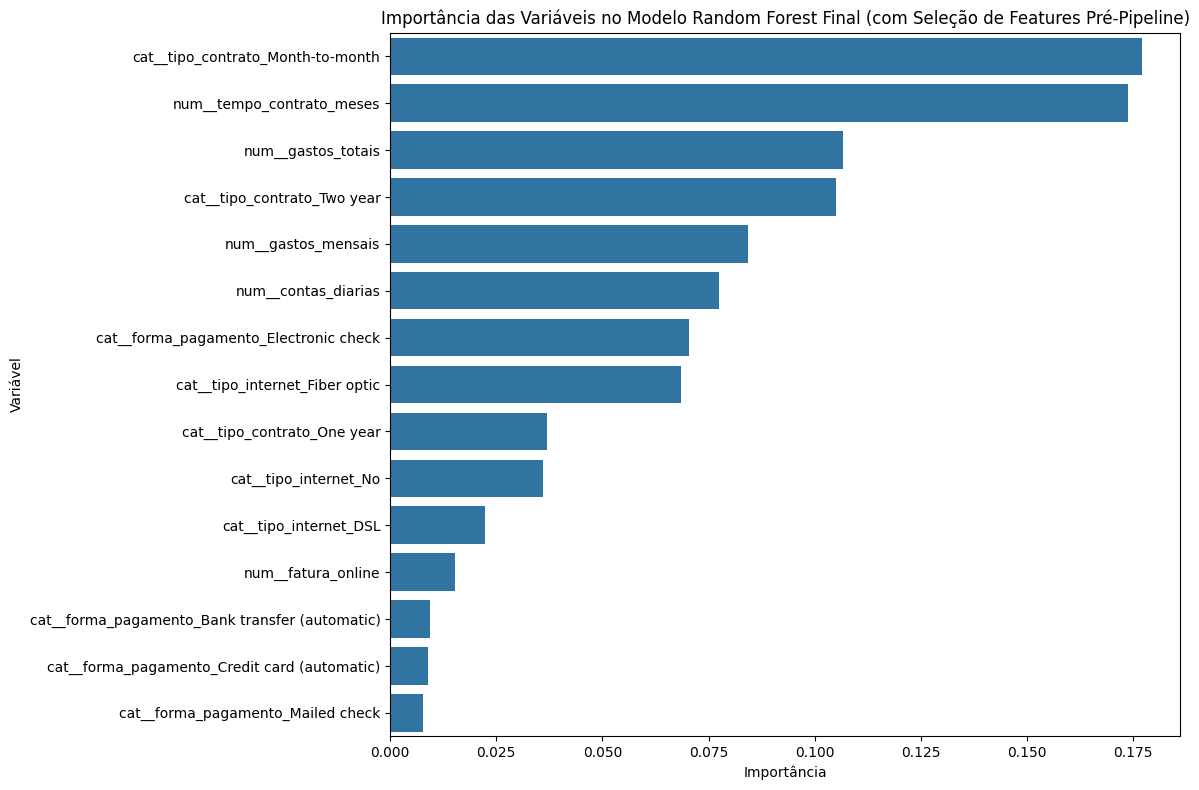

In [58]:
best_pipeline_final = best_rf_model_final_selected


best_rf_classifier_final = best_pipeline_final.named_steps['classifier']

preprocessor_final = best_pipeline_final.named_steps['preprocessor']

X_train_final_processed = preprocessor_final.transform(X_train_selected)


feature_names_final = preprocessor_final.get_feature_names_out(X_train_selected.columns)


feature_importances_final = best_rf_classifier_final.feature_importances_

# Criar um DataFrame para visualizar a importância das features
importance_df_final = pd.DataFrame({
    'Feature': feature_names_final,
    'Importance': feature_importances_final
})

# Ordenar as features por importância em ordem decrescente
importance_df_final = importance_df_final.sort_values(by='Importance', ascending=False)

# Exibir o DataFrame com a importância das features
print("Importância das Variáveis no Modelo Final (com Seleção de Features Pré-Pipeline):")
display(importance_df_final)

# Visualizar a importância das features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_final)
plt.title('Importância das Variáveis no Modelo Random Forest Final (com Seleção de Features Pré-Pipeline)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

# Relatório de Análise e Modelagem para Previsão de Evasão de Clientes

## Introdução
Este relatório apresenta os resultados da análise exploratória e do desenvolvimento de modelos preditivos para identificar clientes com maior probabilidade de evasão. O objetivo é fornecer insights estratégicos para a empresa, permitindo a implementação de ações proativas de retenção.

---

## Análise Exploratória Chave

A análise exploratória inicial revelou insights importantes sobre as características dos clientes e sua relação com a evasão:

*   **Desequilíbrio da Classe Alvo:** A variável `evasao` apresentava um desequilíbrio significativo, com a maioria dos clientes não evadindo. Isso reforça a necessidade de técnicas de balanceamento (como SMOTE) e métricas de avaliação adequadas (Precision, Recall, F1-Score, ROC-AUC).

Da análise exploratória, logo concluimos algumas informações que foram importantes para entender que tipo dado e informações estavamos lidando.

*   **Variáveis Categóricas Relevantes:**
    *   **Tipo de Internet:** Clientes com **fibra óptica** mostram uma tendência maior à evasão.
    *   **Tipo de Contrato:** Contratos **mês a mês** estão fortemente associados a uma maior taxa de evasão, o que é intuitivo, dada a flexibilidade desse tipo de contrato. Contratos de um e dois anos têm taxas de evasão significativamente menores.
    *   **Forma de Pagamento:** Clientes que utilizam **cheque eletrônico** apresentam um comportamento atípico, com uma proporção maior de evasão.
*   **Variáveis Categóricas Booleanas Relevantes:**
    *   A **ausência de parceiro e dependentes** parece aumentar a chance de evasão.
    *   A falta de serviços adicionais como **segurança online** e **suporte técnico** está relacionada a uma maior probabilidade de evasão.
    *   O recebimento de **fatura online** também parece ser um indicador de maior evasão.
    *   Variáveis como `servico_telefonico` e `multiplas_linhas`, `backup_online` e `protecao_dispositivo` mostraram menor impacto na evasão.
*   **Variáveis Numéricas Relevantes:**
    *   **Gastos Mensais (`gastos_mensais`)** e **Contas Diárias (`contas_diarias`)**: Clientes que evadem tendem a ter gastos mensais e diários mais altos, sugerindo que clientes com serviços mais caros podem estar mais insatisfeitos ou serem mais propensos a buscar alternativas.
    *   **Gastos Totais (`gastos_totais`)** e **Tempo de Contrato em Meses (`tempo_contrato_meses`)**: Clientes com gastos totais e tempo de contrato mais altos tendem a não evadir, o que indica a lealdade e o valor desses clientes de longo prazo. A assimetria observada nesses dados reforça que a evasão ocorre predominantemente nos primeiros meses de contrato.

---

## Seleção de Variáveis

Com base na análise de correlação e na importância das features nos modelos iniciais, removemos variáveis com baixa correlação com a evasão para simplificar o modelo e potencialmente melhorar o desempenho e a interpretabilidade. As variáveis com menor relação incluíram `servico_telefonico`, `multiplas_linhas`, `streaming_filmes`, `streaming_tv`, `forma_pagamento_Mailed check`, `backup_online`, e `protecao_dispositivo`.

Após a remoção essas variáveis de baixa correlação, utilizamos os dados codificados, balanceados e padronizados para treinar diversos modelos de classificação e então decidir qual modelo iria ajudar a resolver o problema da evasão de clientes.

---

## Modelagem Preditiva

Avaliamos quatro modelos de classificação: DummyClassifier (Baseline), KNN, Árvore de Decisão e Random Forest.

*   **DummyClassifier (Baseline):** Serviu como ponto de referência, mostrando um desempenho aleatório ou baseado na proporção das classes. Nossas métricas devem ser significativamente melhores que a baseline.
*   **KNN:** Apresentou melhor desempenho que a baseline, com um bom Recall, mas menor Precisão, indicando uma tendência a identificar corretamente a maioria dos evasores, mas com um número considerável de falsos positivos. Mostrou sinais de overfitting.
*   **Árvore de Decisão:** Similar ao KNN, apresentou desempenho significativamente melhor que a baseline, mas também mostrou sinais de overfitting. Com a profundidade limitada, demonstrou um trade-off diferente entre Precisão e Recall comparado ao KNN, sendo mais precisa (menos falsos positivos) com um Recall menor (mais falsos negativos).
*   **Random Forest (Inicial):** Obteve o melhor desempenho inicial na validação, com um bom equilíbrio entre Precisão e Recall (maior F1-Score) e a melhor capacidade de discriminação (maior ROC-AUC) entre os modelos testados na primeira etapa.

Considerando a importância de minimizar Falsos Negativos (clientes que evadem, mas não são identificados), o **Random Forest** foi escolhido como o modelo mais promissor, especialmente por seu bom Recall e ROC-AUC.

---

## Otimização do Modelo Random Forest com Pipeline

Agora, buscando otimizar ainda mais o modelo Random Forest. Buscamos criar um pipeline robusto que garante um resultado mais confiável do que o modelo inicial de Random Forest.

*   **Pipeline:** Para encapsular as etapas de pré-processamento (encoding e escalonamento) e o classificador.
*   **SMOTE:** Aplicado no conjunto de treino para balancear as classes e ajudar o modelo a aprender melhor os padrões da classe minoritária (evasão).
*   **RandomizedSearchCV:** Para buscar os melhores hiperparâmetros do Random Forest, otimizando a métrica 'Recall' com validação cruzada.

O primeiro pipeline criado, acabou apresentando um resultado insatisfatório, no qual atribuimos esse resultado ao fato de que para treinar esse versão do modelo, não realizamos a remoção das variáveis de baixa correlação. Dessa forma, o modelo acabou gastando processamento computacional em features que não tinham muito a agregar.

Dessa forma, aproveitando esse modelo com hiperparâmetros otimizados para métrica 'recall', descobrimos quais eram as 12 features mais importantes para o treinamento e selecionamos elas para treinar um modelo novo ainda mais otimizado.

---

## Seleção de variáveis para o modelo final

As variáveis consideradas mais importantes para o modelo final (baseado na importância das features do pipeline otimizado) foram:

1.  `cat__tipo_contrato_Month-to-month` (Tipo de Contrato: Mês a Mês)
2.  `num__tempo_contrato_meses` (Tempo de Contrato em Meses)
3.  `num__gastos_totais` (Gastos Totais)
4.  `cat__tipo_contrato_Two year` (Tipo de Contrato: Dois Anos)
5.  `num__gastos_mensais` (Gastos Mensais)
6.  `num__contas_diarias` (Contas Diárias)
7.  `cat__forma_pagamento_Electronic check` (Forma de Pagamento: Cheque Eletrônico)
8.  `cat__tipo_internet_Fiber optic` (Tipo de Internet: Fibra Óptica)
9.  `cat__tipo_contrato_One year` (Tipo de Contrato: Um Ano)
10. `cat__tipo_internet_No` (Tipo de Internet: Nenhum Serviço de Internet)
11. `cat__tipo_internet_DSL` (Tipo de Internet: DSL)
12. `num__fatura_online` (Fatura Online)

Essas variáveis confirmam os insights da análise exploratória, destacando a importância do tipo de contrato, tempo de relacionamento, gastos e forma de pagamento, além do tipo de serviço de internet.

---

## Modelo final

A avaliação do **Pipeline Final Otimizado** (com seleção de features pré-pipeline) no conjunto de **Teste** apresentou as seguintes métricas:

*   **Acurácia:** 0.7534
*   **Precisão:** 0.5239
*   **Recall:** 0.7914
*   **F1-Score:** 0.6305
*   **ROC-AUC:** 0.8411

Comparando métricas no conjunto de validação

| Métricas   | Modelo inicial RF | Pipeline não filtrado | Modelo final |
| :--------- | :---------------- | :-------------------- | :----------- |
| Acurácia   | 0.7782            | 0.7747                | 0.7591       |
| Precisão   | 0.5642            | 0.5664                | 0.5326       |
| Recall     | 0.7214            | 0.6497                | 0.7647       |
| F1-Score   | 0.6332            | 0.6052                | 0.6279       |
| ROC-AUC    | 0.8372            | 0.8294                | 0.8323       |

 Comparando com o desempenho do Random Forest **inicial** no conjunto de validação notamos que o modelo final apresentou um **Recall significativamente maior (0.79 vs 0.72)**, o que é desejável para nosso objetivo de identificar evasores (reduzindo falsos negativos). No entanto, a Precisão foi um pouco menor, e a Acurácia também diminuiu ligeiramente. O ROC-AUC se manteve similar, indicando uma boa capacidade de discriminação.

A diferença nos resultados entre o Random Forest inicial (treinado passo a passo) e o pipeline final (com seleção de features) pode ser atribuída a seleção das features a partir de um modelo com hiperparâmetros otimizados, dessa forma, pela importância das variáveis, o modelo final focou em trabalhar naquilo que importa e otimizou ainda mais o resultado.  

**Apesar da leve queda na Acurácia e Precisão em comparação com o modelo inicial (treinado de forma não pipelineada), o modelo final otimizado no pipeline é considerado superior para este problema de negócio porque:**

1.  **Aborda o Desequilíbrio:** O SMOTE no pipeline lida diretamente com o desequilíbrio da classe no treino, o que é crucial para a previsão de eventos raros como a evasão.
2.  **Otimização para o Objetivo:** A otimização focada no Recall alinha o modelo com o objetivo de identificar o máximo possível de clientes que irão evadir.
3.  **Processo Robusto:** O pipeline garante que o pré-processamento (incluindo o escalonamento das variáveis numéricas e codificação ONEHOT, que foi feito manualmente antes e agora está automatizado) e o balanceamento sejam aplicados consistentemente.
4.  **Bom ROC-AUC:** Um ROC-AUC de 0.84 indica que o modelo tem uma boa capacidade de distinguir entre as classes de evasão e não evasão no conjunto de teste, o que é um indicador robusto de seu poder preditivo. Isso, junto da validação cruzada, mostra que o nosso resultado não é obra do acaso e nem sorte. O modelo não está chutando igual a nossa baseline e sim identificando as classes do problema.

---

## Principais Fatores que Influenciam a Evasão (Baseado no Modelo Final)

Com base na importância das features do modelo Random Forest final, os fatores que mais influenciam a evasão são:

*   **Tipo de Contrato (principalmente Mês a Mês vs. Contratos Longos):** Clientes com contratos de curto prazo (mês a mês) são muito mais propensos a evadir.
*   **Tempo de Contrato em Meses:** Quanto menor o tempo de contrato, maior a chance de evasão. A evasão acontece principalmente nos primeiros meses.
*   **Gastos Totais:** Clientes com baixos gastos totais (que geralmente estão há menos tempo na empresa) têm maior probabilidade de evadir.
*   **Forma de Pagamento (principalmente Cheque Eletrônico):** Clientes que pagam com cheque eletrônico apresentam uma tendência maior à evasão.
*   **Tipo de Internet (principalmente Fibra Óptica):** Clientes com fibra óptica evadem mais.
*   **Gastos Mensais / Contas Diárias:** Gastos mensais e diários mais altos estão associados a uma maior chance de evasão.

---

## Estratégias de Retenção Propostas

Com base nesses insights, as seguintes estratégias de retenção podem ser consideradas:

1.  **Foco nos Primeiros Meses:** Implementar programas de *onboarding* intensificados e ofertas especiais para novos clientes nos primeiros meses de contrato, especialmente aqueles com contrato mês a mês. Monitorar de perto o comportamento desses clientes.
2.  **Incentivos para Contratos Mais Longos:** Oferecer descontos ou benefícios para clientes que migram de contratos mês a mês para contratos de um ou dois anos.
3.  **Análise da Experiência com Fibra Óptica:** Investigar as razões pelas quais clientes de fibra óptica evadem mais. Pode haver problemas de qualidade de serviço, suporte, ou expectativas não atendidas. Realizar pesquisas de satisfação específicas para este grupo.
4.  **Monitoramento de Clientes com Cheque Eletrônico:** Tentar entender o padrão de evasão associado a essa forma de pagamento. Pode ser um indicador de clientes menos engajados ou com menos histórico de relacionamento com a empresa.
5.  **Identificação de Clientes de Alto Gasto Mensal em Risco:** Clientes com altos gastos mensais que apresentam outros sinais de risco (como contrato mês a mês ou tempo de contrato baixo) podem ser alvos de ofertas personalizadas ou contato proativo do suporte/sucesso do cliente.
6.  **Promover Serviços Adicionais:** Incentivar a contratação de serviços como segurança online e suporte técnico, que estão associados a menor evasão.
7.  **Segmentação de Clientes:** Utilizar o modelo preditivo para segmentar clientes em diferentes níveis de risco de evasão (alto, médio, baixo) e aplicar estratégias de retenção diferenciadas para cada segmento. Clientes de alto risco podem receber ofertas mais agressivas ou contato pessoal, enquanto clientes de médio risco podem ser abordados com pesquisas de satisfação ou informações sobre novos serviços.

---

## Conclusão

O modelo Random Forest otimizado no pipeline, focado em maximizar o Recall e com um bom ROC-AUC, oferece uma ferramenta valiosa para a empresa identificar proativamente clientes com alta probabilidade de evasão. Os principais impulsionadores da evasão estão relacionados ao tipo de contrato, tempo de relacionamento, gastos e tipo de serviço de internet. Ao focar nesses fatores e implementar estratégias de retenção direcionadas, a empresa pode reduzir significativamente a taxa de evasão e aumentar o valor do tempo de vida do cliente. Recomenda-se a implementação e o monitoramento contínuo deste modelo em ambiente de produção, com re-treinamento periódico para incorporar novos dados e adaptar-se a mudanças no comportamento do cliente.

O modelo final não é perfeito, mas garante que a partir de agora, aproximadamente 80% do clientes que evadem serão classificados corretamente, ou seja, é uma chance da empresa buscar não perder 80% dos clientes que antes ela perderia.  